###### Import Libraries

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

###### Import Dataset

In [155]:
data = pd.read_csv('CFPB-financial-wellness-data.csv',
                     index_col='PUF_ID')

###### Dataset Analysis

In [156]:
data.head()

,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,FWB1_4,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
PUF_ID,,,,,,,,,,,,,,,,,,,,,
10350,2,3,5,5,6,55,3,3,3,3,...,1,4,8,0,0,0,0,1,0,0.367292
7740,1,3,6,6,6,51,2,2,3,3,...,1,2,3,0,0,0,0,2,0,1.327561
13699,1,3,4,3,4,49,3,3,3,3,...,1,4,9,0,0,0,1,2,1,0.835156
7267,1,3,6,6,6,49,3,3,3,3,...,1,3,7,0,0,0,0,1,0,1.410871
7375,1,3,4,4,4,49,3,3,3,3,...,1,2,4,0,0,1,0,4,1,4.260668


In [157]:
# Predictor Distribution
data['PRODUSE_3'].value_counts()

0    5834
1     560
Name: PRODUSE_3, dtype: int64

In [158]:
# Drop the weights
data.drop('finalwt', inplace=True, axis=1)

In [159]:
# Drop because identified as skewing the model
data.drop('PRODUSE_6', inplace=True, axis=1)

In [160]:
# Data Not a Predictor
data.drop('sample', inplace=True, axis=1)

### Use JSON to Store Variables' Labels and Sources

In [161]:
import json

json_data = '''{"PUF_ID":{"label":"Public Use File ID","source":"ID variable"},"sample":{"label":"Sample","source":"Frame data"},"fpl":{"label":"Poverty status","source":"Panel data"},"SWB_1":{"label":"I am satisfied with my life","source":"Survey item"},"SWB_2":{"label":"I am optimistic about my future","source":"Survey item"},"SWB_3":{"label":"If I work hard today, I will be more successful in the future","source":"Survey item"},"FWBscore":{"label":"Financial well-being scale score4","source":"IRT score"},"FWB1_1":{"label":"I could handle a major unexpected expense","source":"Survey item"},"FWB1_2":{"label":"I am securing my financial future","source":"Survey item"},"FWB1_3":{"label":"Because of my money situation...I will never have the things I want in life","source":"Survey item"},"FWB1_4":{"label":"I can enjoy life because of the way I’m managing my money","source":"Survey item"},"FWB1_5":{"label":"I am just getting by financially","source":"Survey item"},"FWB1_6":{"label":"I am concerned that the money I have or will save won’t last","source":"Survey item"},"FWB2_1":{"label":"Giving a gift...would put a strain on my finances for the month","source":"Survey item"},"FWB2_2":{"label":"I have money left over at the end of the month","source":"Survey item"},"FWB2_3":{"label":"I am behind with my finances","source":"Survey item"},"FWB2_4":{"label":"My finances control my life","source":"Survey item"},"FSscore":{"label":"Financial skill scale score5","source":"IRT score"},"FS1_1":{"label":"I know how to get myself to follow through on my financial intentions","source":"Survey item"},"FS1_2":{"label":"I know where to find the advice I need to make decisions involving money","source":"Survey item"},"FS1_3":{"label":"I know how to make complex financial decisions","source":"Survey item"},"FS1_4":{"label":"I am able to make good financial decisions that are new to me","source":"Survey item"},"FS1_5":{"label":"I am able to recognize a good financial investment","source":"Survey item"},"FS1_6":{"label":"I know how to keep myself from spending too much","source":"Survey item"},"FS1_7":{"label":"I know how to make myself save","source":"Survey item"},"FS2_1":{"label":"I know when I do not have enough info to make a good decision involving my money","source":"Survey item"},"FS2_2":{"label":"I know when I need advice about my money","source":"Survey item"},"FS2_3":{"label":"I struggle to understand financial information","source":"Survey item"},"SUBKNOWL1":{"label":"How would you assess your overall financial knowledge?","source":"Survey item"},"ACT1_1":{"label":"I follow-through on my financial commitments to others","source":"Survey item"},"ACT1_2":{"label":"I follow-through on financial goals I set for myself","source":"Survey item"},"FINGOALS":{"label":"Do you have a current or recent financial goal?","source":"Survey item"},"PROPPLAN_1":{"label":"I consult my budget to see how much money I have left","source":"Survey item"},"PROPPLAN_2":{"label":"I actively consider the steps I need to take to stick to my budget","source":"Survey item"},"PROPPLAN_3":{"label":"I set financial goals for what I want to achieve with my money","source":"Survey item"},"PROPPLAN_4":{"label":"I prepare a clear plan of action w/ detailed steps to achieve my financial goals","source":"Survey item"},"MANAGE1_1":{"label":"Paid all your bills on time","source":"Survey item (modified)"},"MANAGE1_2":{"label":"Stayed within your budget or spending plan","source":"Survey item (modified)"},"MANAGE1_3":{"label":"Paid off credit card balance in full each month","source":"Survey item (modified)"},"MANAGE1_4":{"label":"Checked your statements, bills and receipts to make sure there were no errors","source":"Survey item (modified)"},"SAVEHABIT":{"label":"Putting money into savings is a habit for me","source":"Survey item"},"FRUGALITY":{"label":"If I can re-use an item I already have, there’s no sense in buying something new","source":"Survey item"},"AUTOMATED_1":{"label":"A Retirement Savings Account","source":"Survey item"},"AUTOMATED_2":{"label":"A Non-Retirement Savings Account","source":"Survey item"},"ASK1_1":{"label":"I do my own research before making decisions involving money","source":"Survey item"},"ASK1_2":{"label":"I ask other people their opinions before making decisions involving money","source":"Survey item"},"SUBNUMERACY2":{"label":"Prefers words for expressions of probabilities","source":"Survey item"},"SUBNUMERACY1":{"label":"How good are you at working with percentages?","source":"Survey item"},"CHANGEABLE":{"label":"Belief that ability to manage money is NOT changeable","source":"Survey item"},"GOALCONF":{"label":"Confidence in own ability to achieve financial goals","source":"Survey item"},"LMscore":{"label":"Lusardi and Mitchell financial knowledge scale score6","source":"Summative scale score"},"FINKNOWL1":{"label":"Understanding of compound interest","source":"Survey item"},"FINKNOWL2":{"label":"Understanding of inflation and return on savings","source":"Survey item"},"FINKNOWL3":{"label":"Understanding of stock vs mutual fund volatility","source":"Survey item"},"FK1correct":{"label":"FINKNOWL1 answered correctly","source":"Analysis variable"},"FK2correct":{"label":"FINKNOWL2 answered correctly","source":"Analysis variable"},"FK3correct":{"label":"FINKNOWL3 answered correctly","source":"Analysis variable"},"KHscore":{"label":"Knoll and Houts financial knowledge scale score7","source":"IRT score8"},"KHKNOWL1":{"label":"Understanding of long-term returns on","source":"Survey item"},"investment":{"label":"KHKNOWL2","source":"Understanding of stocks vs bond vs savings volatility"},"Survey item":{"label":"medication or took less due to costs","source":"MATHARDSHIP_6"},"Analysis variable":{"label":"ENDSMEET","source":"Difficulty of covering monthly expenses and bills"},"Survey item (modified)":{"label":"PRODHAVE_1","source":"Checking or Savings Account at a bank or credit union"},"Paradata":{"label":"VALUERANGES","source":"If you were to sell your home today, what do you think it would be worth?"},"Utilities shut off due to non-payment":{"label":"Survey item","source":"COLLECT"},"Contacted by debt collector in past 12 months":{"label":"Survey item","source":"REJECTED_1"},"I applied for credit and was turned down":{"label":"Survey item","source":"REJECTED_2"},"I did not apply for credit because I thought would be turned down":{"label":"Survey item","source":"ABSORBSHOCK"},"Confidence in ability to raise $2,000 in 30 days":{"label":"Survey item","source":"BENEFITS_1"},"Health Insurance":{"label":"Survey item","source":"BENEFITS_2"},"401(k) or Other Employer-Sponsored Retirement Savings Account":{"label":"Survey item","source":"BENEFITS_3"},"Defined-Benefit Pension":{"label":"Survey item","source":"BENEFITS_4"},"Tuition Reimbursement and/or Student Debt Repayment":{"label":"Survey item","source":"BENEFITS_5"},"Work/Life Benefits":{"label":"Survey item","source":"FRAUD2"},"Victim of financial fraud or attempted financial fraud in past 5 years":{"label":"Survey item","source":"COVERCOSTS"},"Course of action if income did not cover living costs":{"label":"Survey item","source":"BORROW_1"},"My friends or family would lend me the money and expect me to repay them":{"label":"Survey item","source":"BORROW_2"},"My friends or family would give me the money with no expectation of repayment":{"label":"Survey item","source":"SHOCKS_1"},"Lost a job":{"label":"Survey item","source":"SHOCKS_2"},"Work hours/pay reduced or business owned by self/HH mem had financial difficulty":{"label":"Survey item","source":"SHOCKS_3"},"Received a foreclosure notice":{"label":"Survey item","source":"SHOCKS_4"},"Had a major car or home repair":{"label":"Survey item","source":"SHOCKS_5"},"Had a health emergency":{"label":"Survey item","source":"SHOCKS_6"},"Got a divorce or separation":{"label":"Survey item","source":"SHOCKS_7"},"Added a child to the household":{"label":"Survey item","source":"SHOCKS_8"},"Experienced the death of primary breadwinner":{"label":"Survey item","source":"SHOCKS_9"},"Received a large sum of money beyond normal income":{"label":"Survey item","source":"SHOCKS_10"},"Had a child start daycare or college":{"label":"Survey item","source":"SHOCKS_11"},"Provided unexpected financial support to a family member or friend":{"label":"Survey item","source":"SHOCKS_12"},"Respondent did not select any item in":{"label":"Survey item","source":"medication or took less due to costs"},"MATHARDSHIP_6":{"label":"Utilities shut off due to non-payment","source":"Survey item"},"COLLECT":{"label":"Contacted by debt collector in past 12 months","source":"Survey item"},"REJECTED_1":{"label":"I applied for credit and was turned down","source":"Survey item"},"REJECTED_2":{"label":"I did not apply for credit because I thought would be turned down","source":"Survey item"},"ABSORBSHOCK":{"label":"Confidence in ability to raise $2,000 in 30 days","source":"Survey item"},"BENEFITS_1":{"label":"Health Insurance","source":"Survey item"},"BENEFITS_2":{"label":"401(k) or Other Employer-Sponsored Retirement Savings Account","source":"Survey item"},"BENEFITS_3":{"label":"Defined-Benefit Pension","source":"Survey item"},"BENEFITS_4":{"label":"Tuition Reimbursement and/or Student Debt Repayment","source":"Survey item"},"BENEFITS_5":{"label":"Work/Life Benefits","source":"Survey item"},"FRAUD2":{"label":"Victim of financial fraud or attempted financial fraud in past 5 years","source":"Survey item"},"COVERCOSTS":{"label":"Course of action if income did not cover living costs","source":"Survey item"},"BORROW_1":{"label":"My friends or family would lend me the money and expect me to repay them","source":"Survey item"},"BORROW_2":{"label":"My friends or family would give me the money with no expectation of repayment","source":"Survey item"},"SHOCKS_1":{"label":"Lost a job","source":"Survey item"},"SHOCKS_2":{"label":"Work hours/pay reduced or business owned by self/HH mem had financial difficulty","source":"Survey item"},"SHOCKS_3":{"label":"Received a foreclosure notice","source":"Survey item"},"SHOCKS_4":{"label":"Had a major car or home repair","source":"Survey item"},"SHOCKS_5":{"label":"Had a health emergency","source":"Survey item"},"SHOCKS_6":{"label":"Got a divorce or separation","source":"Survey item"},"SHOCKS_7":{"label":"Added a child to the household","source":"Survey item"},"SHOCKS_8":{"label":"Experienced the death of primary breadwinner","source":"Survey item"},"SHOCKS_9":{"label":"Received a large sum of money beyond normal income","source":"Survey item"},"SHOCKS_10":{"label":"Had a child start daycare or college","source":"Survey item"},"SHOCKS_11":{"label":"Provided unexpected financial support to a family member or friend","source":"Survey item"},"SHOCKS_12":{"label":"Respondent did not select any item in","source":"Survey item"},"HEALTH":{"label":"In general, would you say your health is . . .","source":"Survey item"},"SCFHORIZON":{"label":"Financial planning time horizon","source":"Survey item"},"DISCOUNT":{"label":"If you had a choice, would you rather receive . . .?","source":"Survey item"},"MEMLOSS":{"label":"Experienced memory loss or confusion in past 12 months","source":"Survey item"},"DISTRESS":{"label":"Lot of stress in respondent's life","source":"Survey item"},"SELFCONTROL_1":{"label":"I often act without thinking through all the alternatives","source":"Survey item"},"SELFCONTROL_2":{"label":"I am good at resisting temptation","source":"Survey item"},"SELFCONTROL_3":{"label":"I am able to work diligently toward long-term goals","source":"Survey item"},"OUTLOOK_1":{"label":"There are services in this area to help me","source":"Survey item"},"OUTLOOK_2":{"label":"There are good work opportunities for me, if I choose to take them","source":"Survey item"},"INTERCONNECTIONS_110":{"label":"Parent","source":"Survey item"},"INTERCONNECTIONS_2":{"label":"Spouse/Partner","source":"Survey item"},"INTERCONNECTIONS_3":{"label":"Extended family (e.g., uncle, aunt, cousins, grandparents)","source":"Survey item"},"INTERCONNECTIONS_4":{"label":"Employer","source":"Survey item"},"INTERCONNECTIONS_5":{"label":"Friends/Co-workers","source":"Survey item"},"INTERCONNECTIONS_6":{"label":"Community or faith-based organizations","source":"Survey item"},"INTERCONNECTIONS_7":{"label":"Financial institution","source":"Survey item"},"INTERCONNECTIONS_8":{"label":"Professional advisor, planner or counselor/coach","source":"Survey item"},"INTERCONNECTIONS_9":{"label":"Government","source":"Survey item"},"INTERCONNECTIONS_10":{"label":"Respondent did not select any item in INTERCONNECTIONS bank","source":"Survey item"},"PEM":{"label":"Everyone has a fair chance at moving up the economic ladder","source":"Survey item"},"HOUSESAT":{"label":"How satisfied are you with the place you live currently?","source":"Survey item"},"SOCSEC1":{"label":"Have you started receiving social security retirement benefits?","source":"Survey item"},"SOCSEC2":{"label":"At what age did you begin receiving benefits?","source":"Survey item (modified)"},"SOCSEC3":{"label":"Age likely to start receiving Social Security retirement benefits","source":"Survey item (modified)"},"LIFEEXPECT":{"label":"How likely do you believe it is that you will live beyond age 75?","source":"Survey item"},"HHEDUC":{"label":"Highest level of education of all household members","source":"Survey item (modified)"},"KIDS_NoChildren":{"label":"I have no children that I support financially","source":"Survey item"},"KIDS_1":{"label":"Less than 7 years old","source":"Survey item (modified)"},"KIDS_2":{"label":"7 to 12 years old","source":"Survey item (modified)"},"KIDS_3":{"label":"13 to 17 years old","source":"Survey item (modified)"},"KIDS_4":{"label":"More than 18 years old","source":"Survey item (modified)"},"EMPLOY":{"label":"Primary or only employment status","source":"Analysis variable"},"EMPLOY1_1":{"label":"Self-employed","source":"Survey item"},"EMPLOY1_2":{"label":"Work full-time for an employer or the military","source":"Survey item"},"EMPLOY1_3":{"label":"Work part-time for an employer or the military","source":"Survey item"},"EMPLOY1_4":{"label":"Homemaker","source":"Survey item"},"EMPLOY1_5":{"label":"Full-time student","source":"Survey item"},"EMPLOY1_6":{"label":"Permanently sick, disabled or unable to work","source":"Survey item"},"EMPLOY1_7":{"label":"Unemployed or temporarily laid off","source":"Survey item"},"EMPLOY1_8":{"label":"Retired","source":"Survey item"},"EMPLOY1_9":{"label":"Respondent did not select any item in EMPLOY1 bank","source":"Survey item"},"RETIRE":{"label":"Actual date of retirement vs date planned","source":"Survey item"},"MILITARY":{"label":"Current/former member of US Armed Forces or spouse/dependent of service member","source":"Survey item (modified)"},"Military_Status":{"label":"Military status","source":"Analysis variable"},"agecat":{"label":"Age","source":"Panel data"},"generation":{"label":"Generation","source":"Panel data"},"PPEDUC":{"label":"Education (Highest Degree Received)","source":"Panel data (modified)"},"PPETHM":{"label":"Race / Ethnicity","source":"Panel data (modified)"},"PPGENDER":{"label":"Gender","source":"Panel data"},"PPHHSIZE":{"label":"Household Size","source":"Panel data (modified)"},"PPINCIMP":{"label":"Household Income","source":"Panel data (modified)"},"PPMARIT":{"label":"Marital Status","source":"Panel data (modified)"},"PPMSACAT":{"label":"MSA Status","source":"Panel data"},"PPREG4":{"label":"Census Region","source":"Panel data"},"PPREG9":{"label":"Census Division","source":"Panel data"},"PPT01":{"label":"Presence of Household Members - Children 0-1","source":"Panel data (modified)"},"PPT25":{"label":"Presence of Household Members - Children 2-5","source":"Panel data (modified)"},"PPT612":{"label":"Presence of Household Members - Children 6-12","source":"Panel data (modified)"},"PPT1317":{"label":"Presence of Household Members - Children 13-17","source":"Panel data (modified)"},"PPT18OV":{"label":"Presence of Household Members - Adults 18+","source":"Panel data (modified)"},"PCTLT200FPL":{"label":"County pct less than 200% of poverty level (ACS 2015 5-year SF)","source":"Merged (modified)"},"finalwt":{"label":"Final weight","source":"Weight"}}'''
json_desc_data = '''{"sample":[["Sample","1","General population","All","5,000","78.2%"],["Sample","2","Age 62+ oversample","All","999","15.6%"],["Sample","3","Race/ethnicity and poverty oversample","All","395","6.2%"]],"fpl":[["Poverty status","1","<100% FPL","All","661","10.3%"],["Poverty status","2","100%-199% FPL","All","859","13.4%"],["Poverty status","3","200%+ FPL","All","4,874","76.2%"]],"SWB_1":[["I am satisfied with my life","-4","Response not written to database","All","1","0.0%"],["I am satisfied with my life","-1","Refused","All","30","0.5%"],["I am satisfied with my life","1","1 Strongly disagree","All","154","2.4%"],["I am satisfied with my life","2","2","All","152","2.4%"],["I am satisfied with my life","3","3","All","335","5.2%"],["I am satisfied with my life","4","4","All","803","12.6%"],["I am satisfied with my life","5","5","All","1,458","22.8%"],["I am satisfied with my life","6","6","All","1,926","30.1%"],["I am satisfied with my life","7","7 Strongly agree","All","1,535","24.0%"]],"SWB_2":[["I am optimistic about my future","-4","Response not written to database","All","1","0.0%"],["I am optimistic about my future","-1","Refused","All","56","0.9%"],["I am optimistic about my future","1","1 Strongly disagree","All","132","2.1%"],["I am optimistic about my future","2","2","All","144","2.3%"],["I am optimistic about my future","3","3","All","335","5.2%"],["I am optimistic about my future","4","4","All","839","13.1%"],["I am optimistic about my future","5","5","All","1,399","21.9%"],["I am optimistic about my future","6","6","All","1,846","28.9%"],["I am optimistic about my future","7","7 Strongly agree","All","1,642","25.7%"]],"SWB_3":[["If I work hard today, I will be more successful in the future","-4","Response not written to database","All","1","0.0%"],["If I work hard today, I will be more successful in the future","-1","Refused","All","64","1.0%"],["If I work hard today, I will be more successful in the future","1","1 Strongly disagree","All","167","2.6%"],["If I work hard today, I will be more successful in the future","2","2","All","138","2.2%"],["If I work hard today, I will be more successful in the future","3","3","All","267","4.2%"],["If I work hard today, I will be more successful in the future","4","4","All","862","13.5%"],["If I work hard today, I will be more successful in the future","5","5","All","1,251","19.6%"],["If I work hard today, I will be more","6","6","All","1,653","25.9%"],["If I work hard today, I will be more successful in the future","7","7 Strongly agree","All","1,991","31.1%"]],"FWBscore":[["Financial well-being scale score","-4","Response not written to database","All","1","0.0%"],["Financial well-being scale score","-1","Refused","All","4","0.1%"],["Financial well-being scale score","14","14","All","21","0.3%"],["Financial well-being scale score","16","16","All","3","0.0%"],["Financial well-being scale score","17","17","All","8","0.1%"],["Financial well-being scale score","18","18","All","5","0.1%"],["Financial well-being scale score","19","19","All","5","0.1%"],["Financial well-being scale score","20","20","All","4","0.1%"],["Financial well-being scale score","21","21","All","13","0.2%"],["Financial well-being scale score","22","22","All","13","0.2%"],["Financial well-being scale score","23","23","All","18","0.3%"],["Financial well-being scale score","24","24","All","17","0.3%"],["Financial well-being scale score","25","25","All","16","0.3%"],["Financial well-being scale score","26","26","All","30","0.5%"],["Financial well-being scale score","27","27","All","20","0.3%"],["Financial well-being scale score","28","28","All","20","0.3%"],["Financial well-being scale score","29","29","All","42","0.7%"],["Financial well-being scale score","30","30","All","31","0.5%"],["Financial well-being scale score","31","31","All","29","0.5%"],["Financial well-being scale score","32","32","All","31","0.5%"],["Financial well-being scale score","33","33","All","49","0.8%"],["Financial well-being scale score","34","34","All","55","0.9%"],["Financial well-being scale score","35","35","All","44","0.7%"],["Financial well-being scale score","36","36","All","51","0.8%"],["Financial well-being scale score","37","37","All","68","1.1%"],["Financial well-being scale score","38","38","All","58","0.9%"],["Financial well-being scale score","39","39","All","77","1.2%"],["Financial well-being scale score","40","40","All","88","1.4%"],["Financial well-being scale score","41","41","All","77","1.2%"],["Financial well-being scale score","42","42","All","94","1.5%"],["Financial well-being scale score","43","43","All","97","1.5%"],["Financial well-being scale score","44","44","All","102","1.6%"],["Financial well-being scale score","45","45","All","103","1.6%"],["Financial well-being scale score","46","46","All","115","1.8%"],["Financial well-being scale score","47","47","All","153","2.4%"],["Financial well-being scale score","48","48","All","146","2.3%"],["Financial well-being scale score","49","49","All","240","3.8%"],["Financial well-being scale score","50","50","All","204","3.2%"],["Financial well-being scale score","51","51","All","198","3.1%"],["Financial well-being scale score","52","52","All","179","2.8%"],["Financial well-being scale score","53","53","All","185","2.9%"],["Financial well-being scale score","54","54","All","187","2.9%"],["Financial well-being scale score","55","55","All","193","3.0%"],["Financial well-being scale score","56","56","All","181","2.8%"],["Financial well-being scale score","57","57","All","186","2.9%"],["Financial well-being scale score","58","58","All","207","3.2%"],["Financial well-being scale score","59","59","All","217","3.4%"],["Financial well-being scale score","60","60","All","186","2.9%"],["Financial well-being scale score","61","61","All","192","3.0%"],["Financial well-being scale score","62","62","All","186","2.9%"],["Financial well-being scale score","63","63","All","177","2.8%"],["Financial well-being scale score","64","64","All","141","2.2%"],["Financial well-being scale score","65","65","All","148","2.3%"],["Financial well-being scale score","66","66","All","118","1.8%"],["Financial well-being scale score","67","67","All","130","2.0%"],["Financial well-being scale score","68","68","All","124","1.9%"],["Financial well-being scale score","69","69","All","100","1.6%"],["Financial well-being scale score","70","70","All","103","1.6%"],["Financial well-being scale score","71","71","All","76","1.2%"],["Financial well-being scale score","72","72","All","92","1.4%"],["Financial well-being scale score","73","73","All","68","1.1%"],["Financial well-being scale score","74","74","All","59","0.9%"],["Financial well-being scale score","75","75","All","78","1.2%"],["Financial well-being scale score","76","76","All","54","0.8%"],["Financial well-being scale score","77","77","All","51","0.8%"],["Financial well-being scale score","78","78","All","58","0.9%"],["Financial well-being scale score","79","79","All","45","0.7%"],["Financial well-being scale score","80","80","All","33","0.5%"],["Financial well-being scale score","81","81","All","37","0.6%"],["Financial well-being scale score","82","82","All","25","0.4%"],["Financial well-being scale score","83","83","All","17","0.3%"],["Financial well-being scale score","84","84","All","22","0.3%"],["Financial well-being scale score","85","85","All","24","0.4%"],["Financial well-being scale score","86","86","All","62","1.0%"],["Financial well-being scale score","87","87","All","7","0.1%"],["Financial well-being scale score","88","88","All","14","0.2%"],["Financial well-being scale score","89","89","All","11","0.2%"],["Financial well-being scale score","90","90","All","2","0.0%"],["Financial well-being scale score","95","95","All","69","1.1%"]],"FWB1_1":[["I could handle a major unexpected expense","-4","Response not written to database","All","1","0.0%"],["I could handle a major unexpected expense","-1","Refused","All","10","0.2%"],["I could handle a major unexpected expense","1","Not at all","All","927","14.5%"],["I could handle a major unexpected expense","2","Very little","All","989","15.5%"],["I could handle a major unexpected expense","3","Somewhat","All","2,103","32.9%"],["I could handle a major unexpected expense","4","Very well","All","1,531","23.9%"],["I could handle a major unexpected expense","5","Completely","All","833","13.0%"]],"FWB1_2":[["I am securing my financial future","-4","Response not written to database","All","1","0.0%"],["I am securing my financial future","-1","Refused","All","10","0.2%"],["I am securing my financial future","1","Not at all","All","538","8.4%"],["I am securing my financial future","2","Very little","All","974","15.2%"],["I am securing my financial future","3","Somewhat","All","2,303","36.0%"],["I am securing my financial future","4","Very well","All","1,812","28.3%"],["I am securing my financial future","5","Completely","All","756","11.8%"]],"FWB1_3":[["Because of my money situation...I will never have the things I want in life","-4","Response not written to database","All","1","0.0%"],["Because of my money situation...I will never have the things I want in life","-1","Refused","All","8","0.1%"],["Because of my money situation...I will never have the things I want in life","1","Not at all","All","1,382","21.6%"],["Because of my money situation...I will never have the things I want in life","2","Very little","All","1,976","30.9%"],["Because of my money situation...I will never have the things I want in life","3","Somewhat","All","1,790","28.0%"],["Because of my money situation...I will never have the things I want in life","4","Very well","All","692","10.8%"],["Because of my money situation...I will never have the things I want in life","5","Completely","All","545","8.5%"]],"FWB1_4":[["I can enjoy life because of the way I'm managing my money","-4","Response not written to database","All","1","0.0%"],["I can enjoy life because of the way I'm managing my money","-1","Refused","All","10","0.2%"],["I can enjoy life because of the way I'm managing my money","1","Not at all","All","367","5.7%"],["I can enjoy life because of the way I'm managing my money","2","Very little","All","870","13.6%"],["I can enjoy life because of the way I'm managing my money","3","Somewhat","All","2,456","38.4%"],["I can enjoy life because of the way I'm managing my money","4","Very well","All","1,902","29.7%"],["I can enjoy life because of the way I'm managing my money","5","Completely","All","788","12.3%"]],"FWB1_5":[["I am just getting by financially","-4","Response not written to database","All","1","0.0%"],["I am just getting by financially","-1","Refused","All","12","0.2%"],["I am just getting by financially","1","Not at all","All","1,233","19.3%"],["I am just getting by financially","2","Very little","All","1,436","22.5%"],["I am just getting by financially","3","Somewhat","All","1,983","31.0%"],["I am just getting by financially","4","Very well","All","962","15.0%"],["I am just getting by financially","5","Completely","All","767","12.0%"]],"FWB1_6":[["I am concerned that the money I have or will save won't last","-4","Response not written to database","All","1","0.0%"],["I am concerned that the money I have or will save won't last","-1","Refused","All","8","0.1%"],["I am concerned that the money I have or will save won't last","1","Not at all","All","598","9.4%"],["I am concerned that the money I have or will save won't last","2","Very little","All","1,329","20.8%"],["I am concerned that the money I have or will save won't last","3","Somewhat","All","2,420","37.8%"],["I am concerned that the money I have or will save won't last","4","Very well","All","1,052","16.5%"],["I am concerned that the money I have or will save won't last","5","Completely","All","986","15.4%"]],"FWB2_1":[["Giving a gift...would put a strain on my finances for the month","-4","Response not written to database","All","1","0.0%"],["Giving a gift...would put a strain on my finances for the month","-1","Refused","All","9","0.1%"],["Giving a gift...would put a strain on my finances for the month","1","Never","All","1,776","27.8%"],["Giving a gift...would put a strain on my finances for the month","2","Rarely","All","2,095","32.8%"],["Giving a gift...would put a strain on my finances for the month","3","Sometimes","All","1,501","23.5%"],["Giving a gift...would put a strain on my finances for the month","4","Often","All","580","9.1%"],["Giving a gift...would put a strain on my finances for the month","5","Always","All","432","6.8%"]],"FWB2_2":[["I have money left over at the end of the month","-4","Response not written to database","All","1","0.0%"],["I have money left over at the end of the month","-1","Refused","All","13","0.2%"],["I have money left over at the end of the month","1","Never","All","541","8.5%"],["I have money left over at the end of the month","2","Rarely","All","1,012","15.8%"],["I have money left over at the end of the month","3","Sometimes","All","1,779","27.8%"],["I have money left over at the end of the month","4","Often","All","1,461","22.8%"],["I have money left over at the end of the month","5","Always","All","1,587","24.8%"]],"FWB2_3":[["I am behind with my finances","-4","Response not written to database","All","1","0.0%"],["I am behind with my finances","-1","Refused","All","10","0.2%"],["I am behind with my finances","1","Never","All","2,512","39.3%"],["I am behind with my finances","2","Rarely","All","2,089","32.7%"],["I am behind with my finances","3","Sometimes","All","1,099","17.2%"],["I am behind with my finances","4","Often","All","413","6.5%"],["I am behind with my finances","5","Always","All","270","4.2%"]],"FWB2_4":[["My finances control my life","-4","Response not written to database","All","1","0.0%"],["My finances control my life","-1","Refused","All","11","0.2%"],["My finances control my life","1","Never","All","944","14.8%"],["My finances control my life","2","Rarely","All","1,970","30.8%"],["My finances control my life","3","Sometimes","All","2,046","32.0%"],["My finances control my life","4","Often","All","930","14.5%"],["My finances control my life","5","Always","All","492","7.7%"]],"FSscore":[["Financial skill scale score","-1","Refused","All","8","0.1%"],["Financial skill scale score","5","5","All","2","0.0%"],["Financial skill scale score","8","8","All","2","0.0%"],["Financial skill scale score","9","9","All","1","0.0%"],["Financial skill scale score","10","10","All","8","0.1%"],["Financial skill scale score","12","12","All","2","0.0%"],["Financial skill scale score","13","13","All","2","0.0%"],["Financial skill scale score","14","14","All","7","0.1%"],["Financial skill scale score","15","15","All","3","0.0%"],["Financial skill scale score","16","16","All","8","0.1%"],["Financial skill scale score","17","17","All","4","0.1%"],["Financial skill scale score","18","18","All","9","0.1%"],["Financial skill scale score","19","19","All","4","0.1%"],["Financial skill scale score","20","20","All","3","0.0%"],["Financial skill scale score","21","21","All","4","0.1%"],["Financial skill scale score","22","22","All","10","0.2%"],["Financial skill scale score","23","23","All","9","0.1%"],["Financial skill scale score","24","24","All","14","0.2%"],["Financial skill scale score","25","25","All","15","0.2%"],["Financial skill scale score","26","26","All","14","0.2%"],["Financial skill scale score","27","27","All","19","0.3%"],["Financial skill scale score","28","28","All","28","0.4%"],["Financial skill scale score","29","29","All","38","0.6%"],["Financial skill scale score","30","30","All","44","0.7%"],["Financial skill scale score","31","31","All","45","0.7%"],["Financial skill scale score","32","32","All","44","0.7%"],["Financial skill scale score","33","33","All","50","0.8%"],["Financial skill scale score","34","34","All","68","1.1%"],["Financial skill scale score","35","35","All","82","1.3%"],["Financial skill scale score","36","36","All","75","1.2%"],["Financial skill scale score","37","37","All","84","1.3%"],["Financial skill scale score","38","38","All","112","1.8%"],["Financial skill scale score","39","39","All","132","2.1%"],["Financial skill scale score","40","40","All","161","2.5%"],["Financial skill scale score","41","41","All","190","3.0%"],["Financial skill scale score","42","42","All","377","5.9%"],["Financial skill scale score","43","43","All","213","3.3%"],["Financial skill scale score","44","44","All","203","3.2%"],["Financial skill scale score","45","45","All","218","3.4%"],["Financial skill scale score","46","46","All","171","2.7%"],["Financial skill scale score","47","47","All","200","3.1%"],["Financial skill scale score","48","48","All","181","2.8%"],["Financial skill scale score","49","49","All","212","3.3%"],["Financial skill scale score","50","50","All","209","3.3%"],["Financial skill scale score","51","51","All","241","3.8%"],["Financial skill scale score","52","52","All","197","3.1%"],["Financial skill scale score","53","53","All","211","3.3%"],["Financial skill scale score","54","54","All","216","3.4%"],["Financial skill scale score","55","55","All","233","3.6%"],["Financial skill scale score","56","56","All","246","3.8%"],["Financial skill scale score","57","57","All","212","3.3%"],["Financial skill scale score","58","58","All","207","3.2%"],["Financial skill scale score","59","59","All","103","1.6%"],["Financial skill scale score","60","60","All","128","2.0%"],["Financial skill scale score","61","61","All","102","1.6%"],["Financial skill scale score","62","62","All","73","1.1%"],["Financial skill scale score","63","63","All","66","1.0%"],["Financial skill scale score","64","64","All","81","1.3%"],["Financial skill scale score","65","65","All","66","1.0%"],["Financial skill scale score","66","66","All","50","0.8%"],["Financial skill scale score","67","67","All","54","0.8%"],["Financial skill scale score","68","68","All","43","0.7%"],["Financial skill scale score","69","69","All","60","0.9%"],["Financial skill scale score","70","70","All","46","0.7%"],["Financial skill scale score","71","71","All","43","0.7%"],["Financial skill scale score","72","72","All","24","0.4%"],["Financial skill scale score","73","73","All","36","0.6%"],["Financial skill scale score","74","74","All","16","0.3%"],["Financial skill scale score","75","75","All","34","0.5%"],["Financial skill scale score","76","76","All","32","0.5%"],["Financial skill scale score","77","77","All","28","0.4%"],["Financial skill scale score","78","78","All","26","0.4%"],["Financial skill scale score","79","79","All","44","0.7%"],["Financial skill scale score","80","80","All","15","0.2%"],["Financial skill scale score","81","81","All","16","0.3%"],["Financial skill scale score","82","82","All","46","0.7%"],["Financial skill scale score","85","85","All","114","1.8%"]],"FS1_1":[["I know how to get myself to follow through on my financial intentions","-1","Refused","All","12","0.2%"],["I know how to get myself to follow through on my financial intentions","1","Not at all","All","137","2.1%"],["I know how to get myself to follow through on my financial intentions","2","Very little","All","470","7.4%"],["I know how to get myself to follow through on my financial intentions","3","Somewhat","All","2,189","34.2%"],["I know how to get myself to follow through on my financial intentions","4","Very well","All","2,490","38.9%"],["I know how to get myself to follow through on my financial intentions","5","Completely","All","1,096","17.1%"]],"FS1_2":[["I know where to find the advice I need to make decisions involving money","-1","Refused","All","11","0.2%"],["I know where to find the advice I need to make decisions involving money","1","Not at all","All","264","4.1%"],["I know where to find the advice I need to make decisions involving money","2","Very little","All","655","10.2%"],["I know where to find the advice I need to make decisions involving money","3","Somewhat","All","2,025","31.7%"],["I know where to find the advice I need to make decisions involving money","4","Very well","All","2,230","34.9%"],["I know where to find the advice I need to make decisions involving money","5","Completely","All","1,209","18.9%"]],"FS1_3":[["I know how to make complex financial decisions","-1","Refused","All","12","0.2%"],["I know how to make complex financial decisions","1","Not at all","All","329","5.1%"],["I know how to make complex financial decisions","2","Very little","All","1,002","15.7%"],["I know how to make complex financial decisions","3","Somewhat","All","2,525","39.5%"],["I know how to make complex financial decisions","4","Very well","All","1,802","28.2%"],["I know how to make complex financial decisions","5","Completely","All","724","11.3%"]],"FS1_4":[["I am able to make good financial decisions that are new to me","-1","Refused","All","10","0.2%"],["I am able to make good financial decisions that are new to me","1","Not at all","All","249","3.9%"],["I am able to make good financial decisions that are new to me","2","Very little","All","764","11.9%"],["I am able to make good financial decisions that are new to me","3","Somewhat","All","2,721","42.6%"],["I am able to make good financial decisions that are new to me","4","Very well","All","1,977","30.9%"],["I am able to make good financial decisions that are new to me","5","Completely","All","673","10.5%"]],"FS1_5":[["I am able to recognize a good financial investment","-1","Refused","All","11","0.2%"],["I am able to recognize a good financial investment","1","Not at all","All","466","7.3%"],["I am able to recognize a good financial investment","2","Very little","All","1,173","18.3%"],["I am able to recognize a good financial investment","3","Somewhat","All","2,790","43.6%"],["I am able to recognize a good financial investment","4","Very well","All","1,442","22.6%"],["I am able to recognize a good financial investment","5","Completely","All","512","8.0%"]],"FS1_6":[["I know how to keep myself from spending too much","-1","Refused","All","10","0.2%"],["I know how to keep myself from spending too much","1","Not at all","All","120","1.9%"],["I know how to keep myself from spending too much","2","Very little","All","382","6.0%"],["I know how to keep myself from spending too much","3","Somewhat","All","1,828","28.6%"],["I know how to keep myself from spending too much","4","Very well","All","2,572","40.2%"],["I know how to keep myself from spending too much","5","Completely","All","1,482","23.2%"]],"FS1_7":[["I know how to make myself save","-1","Refused","All","8","0.1%"],["I know how to make myself save","1","Not at all","All","152","2.4%"],["I know how to make myself save","2","Very little","All","506","7.9%"],["I know how to make myself save","3","Somewhat","All","1,876","29.3%"],["I know how to make myself save","4","Very well","All","2,413","37.7%"],["I know how to make myself save","5","Completely","All","1,439","22.5%"]],"FS2_1":[["I know when I do not have enough info to make a good decision involving my money","-1","Refused","All","14","0.2%"],["I know when I do not have enough info to make a good decision involving my money","1","Never","All","70","1.1%"],["I know when I do not have enough info to make a good decision involving my money","2","Rarely","All","348","5.4%"],["I know when I do not have enough info to make a good decision involving my money","3","Sometimes","All","1,914","29.9%"],["I know when I do not have enough info to make a good decision involving my money","4","Often","All","2,824","44.2%"],["I know when I do not have enough info to make a good decision involving my money","5","Always","All","1,224","19.1%"]],"FS2_2":[["I know when I need advice about my money","-1","Refused","All","14","0.2%"],["I know when I need advice about my money","1","Never","All","120","1.9%"],["I know when I need advice about my money","2","Rarely","All","495","7.7%"],["I know when I need advice about my money","3","Sometimes","All","2,177","34.0%"],["I know when I need advice about my money","4","Often","All","2,382","37.3%"],["I know when I need advice about my money","5","Always","All","1,206","18.9%"]],"FS2_3":[["I struggle to understand financial information","-1","Refused","All","14","0.2%"],["I struggle to understand financial information","1","Never","All","515","8.1%"],["I struggle to understand financial information","2","Rarely","All","2,227","34.8%"],["I struggle to understand financial information","3","Sometimes","All","2,681","41.9%"],["I struggle to understand financial information","4","Often","All","711","11.1%"],["I struggle to understand financial information","5","Always","All","246","3.8%"]],"SUBKNOWL1":[["How would you assess your overall financial knowledge?","-1","Refused","All","52","0.8%"],["How would you assess your overall financial knowledge?","1","1 - Very low","All","124","1.9%"],["How would you assess your overall financial knowledge?","2","2","All","153","2.4%"],["How would you assess your overall financial knowledge?","3","3","All","528","8.3%"],["How would you assess your overall financial knowledge?","4","4","All","1,489","23.3%"],["How would you assess your overall financial knowledge?","5","5","All","2,648","41.4%"],["How would you assess your overall financial knowledge?","6","6","All","1,072","16.8%"],["How would you assess your overall financial knowledge?","7","7 - Very high","All","328","5.1%"]],"ACT1_1":[["I follow-through on my financial commitments to others","-1","Refused","All","24","0.4%"],["I follow-through on my financial commitments to others","1","Not at all","All","53","0.8%"],["I follow-through on my financial commitments to others","2","Very little","All","165","2.6%"],["I follow-through on my financial commitments to others","3","Somewhat","All","905","14.2%"],["I follow-through on my financial commitments to others","4","Very well","All","2,368","37.0%"],["I follow-through on my financial commitments to others","5","Completely","All","2,879","45.0%"]],"ACT1_2":[["I follow-through on financial goals I set for myself","-1","Refused","All","18","0.3%"],["I follow-through on financial goals I set for myself","1","Not at all","All","100","1.6%"],["I follow-through on financial goals I set for myself","2","Very little","All","468","7.3%"],["I follow-through on financial goals I set for myself","3","Somewhat","All","2,214","34.6%"],["I follow-through on financial goals I set for myself","4","Very well","All","2,565","40.1%"],["I follow-through on financial goals I set for myself","5","Completely","All","1,029","16.1%"]],"FINGOALS":[["Do you have a current or recent financial goal?","-1","Refused","All","76","1.2%"],["Do you have a current or recent financial goal?","0","No","All","2,269","35.5%"],["Do you have a current or recent financial goal?","1","Yes","All","4,049","63.3%"]],"PROPPLAN_1":[["I consult my budget to see how much money I have left","1","Strongly disagree","All","200","3.1%"],["I consult my budget to see how much money I have left","2","Disagree","All","727","11.4%"],["I consult my budget to see how much money I have left","3","Neither agree nor disagree","All","1,330","20.8%"],["I consult my budget to see how much money I have left","4","Agree","All","2,776","43.4%"],["I consult my budget to see how much money I have left","5","Strongly agree","All","1,351","21.1%"]],"PROPPLAN_2":[["I actively consider the steps I need to take to stick to my budget","-1","Refused","All","10","0.2%"],["I actively consider the steps I need to take to stick to my budget","1","Strongly disagree","All","132","2.1%"],["I actively consider the steps I need to take to stick to my budget","2","Disagree","All","653","10.2%"],["I actively consider the steps I need to take to stick to my budget","3","Neither agree nor disagree","All","1,629","25.5%"],["I actively consider the steps I need to take to stick to my budget","4","Agree","All","2,986","46.7%"],["I actively consider the steps I need to take to stick to my budget","5","Strongly agree","All","984","15.4%"]],"PROPPLAN_3":[["I set financial goals for what I want to achieve with my money","-1","Refused","All","10","0.2%"],["I set financial goals for what I want to achieve with my money","1","Strongly disagree","All","127","2.0%"],["I set financial goals for what I want to achieve with my money","2","Disagree","All","528","8.3%"],["I set financial goals for what I want to achieve with my money","3","Neither agree nor disagree","All","1,625","25.4%"],["I set financial goals for what I want to achieve with my money","4","Agree","All","3,089","48.3%"],["I set financial goals for what I want to achieve with my money","5","Strongly agree","All","1,015","15.9%"]],"PROPPLAN_4":[["I prepare a clear plan of action w/ detailed steps to achieve my financial goals","-1","Refused","All","10","0.2%"],["I prepare a clear plan of action w/ detailed steps to achieve my financial goals","1","Strongly disagree","All","265","4.1%"],["I prepare a clear plan of action w/ detailed steps to achieve my financial goals","2","Disagree","All","1,197","18.7%"],["I prepare a clear plan of action w/ detailed steps to achieve my financial goals","3","Neither agree nor disagree","All","2,208","34.5%"],["I prepare a clear plan of action w/ detailed steps to achieve my financial goals","4","Agree","All","2,035","31.8%"],["I prepare a clear plan of action w/ detailed steps to achieve my financial goals","5","Strongly agree","All","679","10.6%"]],"MANAGE1_1":[["Paid all your bills on time","-1","Refused","All","12","0.2%"],["Paid all your bills on time","1","Not applicable or never","All","137","2.1%"],["Paid all your bills on time","2","Seldom","All","148","2.3%"],["Paid all your bills on time","3","Sometimes","All","491","7.7%"],["Paid all your bills on time","4","Often","All","940","14.7%"],["Paid all your bills on time","5","Always","All","4,666","73.0%"]],"MANAGE1_2":[["Stayed within your budget or spending plan","-1","Refused","All","12","0.2%"],["Stayed within your budget or spending plan","1","Not applicable or never","All","296","4.6%"],["Stayed within your budget or spending plan","2","Seldom","All","381","6.0%"],["Stayed within your budget or spending plan","3","Sometimes","All","1,397","21.8%"],["Stayed within your budget or spending plan","4","Often","All","2,434","38.1%"],["Stayed within your budget or spending plan","5","Always","All","1,874","29.3%"]],"MANAGE1_3":[["Paid off credit card balance in full each month","-1","Refused","All","11","0.2%"],["Paid off credit card balance in full each month","1","Not applicable or never","All","1,208","18.9%"],["Paid off credit card balance in full each month","2","Seldom","All","640","10.0%"],["Paid off credit card balance in full each month","3","Sometimes","All","857","13.4%"],["Paid off credit card balance in full each month","4","Often","All","835","13.1%"],["Paid off credit card balance in full each month","5","Always","All","2,843","44.5%"]],"MANAGE1_4":[["Checked your statements, bills and receipts to make sure there were no errors","-1","Refused","All","11","0.2%"],["Checked your statements, bills and receipts to make sure there were no errors","1","Not applicable or never","All","196","3.1%"],["Checked your statements, bills and receipts to make sure there were no errors","2","Seldom","All","325","5.1%"],["Checked your statements, bills and receipts to make sure there were no errors","3","Sometimes","All","833","13.0%"],["Checked your statements, bills and receipts to make sure there were no errors","4","Often","All","1,596","25.0%"],["Checked your statements, bills and receipts to make sure there were no errors","5","Always","All","3,433","53.7%"]],"SAVEHABIT":[["Putting money into savings is a habit for me","-1","Refused","All","20","0.3%"],["Putting money into savings is a habit for me","1","Strongly disagree","All","297","4.6%"],["Putting money into savings is a habit for me","2","Disagree","All","610","9.5%"],["Putting money into savings is a habit for me","3","Disagree slightly","All","659","10.3%"],["Putting money into savings is a habit for me","4","Agree slightly","All","1,329","20.8%"],["Putting money into savings is a habit for me","5","Agree","All","1,729","27.0%"],["Putting money into savings is a habit for me","6","Strongly agree","All","1,750","27.4%"]],"FRUGALITY":[["If I can re-use an item I already have, there's no sense in buying something new","-1","Refused","All","15","0.2%"],["If I can re-use an item I already have, there's no sense in buying something new","1","Strongly disagree","All","22","0.3%"],["If I can re-use an item I already have, there's no sense in buying something new","2","Disagree","All","50","0.8%"],["If I can re-use an item I already have, there's no sense in buying something new","3","Disagree slightly","All","195","3.0%"],["If I can re-use an item I already have, there's no sense in buying something new","4","Agree slightly","All","805","12.6%"],["If I can re-use an item I already have, there's no sense in buying something new","5","Agree","All","2,461","38.5%"],["If I can re-use an item I already have, there's no sense in buying something new","6","Strongly agree","All","2,846","44.5%"]],"AUTOMATED_1":[["A Retirement Savings Account","-1","Refused","All","91","1.4%"],["A Retirement Savings Account","0","No","All","1,973","30.9%"],["A Retirement Savings Account","1","Yes","All","2,587","40.5%"],["A Retirement Savings Account","7","I do not have this type of account","All","1,743","27.3%"]],"AUTOMATED_2":[["A Non-Retirement Savings Account","-1","Refused","All","98","1.5%"],["A Non-Retirement Savings Account","0","No","All","2,328","36.4%"],["A Non-Retirement Savings Account","1","Yes","All","2,536","39.7%"],["A Non-Retirement Savings Account","7","I do not have this type of account","All","1,432","22.4%"]],"ASK1_1":[["I do my own research before making decisions involving money","-1","Refused","All","27","0.4%"],["I do my own research before making decisions involving money","1","Never","All","212","3.3%"],["I do my own research before making decisions involving money","2","Seldom","All","470","7.4%"],["I do my own research before making decisions involving money","3","Sometimes","All","1,797","28.1%"],["I do my own research before making decisions involving money","4","Often","All","2,321","36.3%"],["I do my own research before making decisions involving money","5","Always","All","1,567","24.5%"]],"ASK1_2":[["I ask other people their opinions before making decisions involving money","-1","Refused","All","26","0.4%"],["I ask other people their opinions before making decisions involving money","1","Never","All","704","11.0%"],["I ask other people their opinions before making decisions involving money","2","Seldom","All","1,478","23.1%"],["I ask other people their opinions before making decisions involving money","3","Sometimes","All","2,603","40.7%"],["I ask other people their opinions before making decisions involving money","4","Often","All","1,261","19.7%"],["I ask other people their opinions before making decisions involving money","5","Always","All","322","5.0%"]],"SUBNUMERACY2":[["Prefers words for expressions of probabilities","-1","Refused","All","39","0.6%"],["Prefers words for expressions of probabilities","1","1 - Always prefer words","All","975","15.2%"],["Prefers words for expressions of probabilities","2","2","All","535","8.4%"],["Prefers words for expressions of probabilities","3","3","All","1,253","19.6%"],["Prefers words for expressions of probabilities","4","4","All","1,378","21.6%"],["Prefers words for expressions of probabilities","5","5","All","1,114","17.4%"],["Prefers words for expressions of probabilities","6","6 - Always prefer numbers","All","1,100","17.2%"],["Prefers words for expressions of probabilities","6","6 - Always prefer numbers","All","1,100","17.2%"]],"SUBNUMERACY1":[["How good are you at working with percentages?","-1","Refused","All","33","0.5%"],["How good are you at working with percentages?","1","1 - Not good at all","All","362","5.7%"],["How good are you at working with percentages?","2","2","All","336","5.3%"],["How good are you at working with percentages?","3","3","All","786","12.3%"],["How good are you at working with percentages?","4","4","All","1,600","25.0%"],["How good are you at working with percentages?","5","5","All","1,748","27.3%"],["How good are you at working with percentages?","6","6 - Extremely good","All","1,529","23.9%"],["How good are you at working with percentages?","-1","Refused","All","33","0.5%"],["How good are you at working with percentages?","1","1 - Not good at all","All","362","5.7%"],["How good are you at working with percentages?","2","2","All","336","5.3%"],["How good are you at working with percentages?","3","3","All","786","12.3%"],["How good are you at working with percentages?","4","4","All","1,600","25.0%"],["How good are you at working with percentages?","5","5","All","1,748","27.3%"],["How good are you at working with percentages?","6","6 - Extremely good","All","1,529","23.9%"]],"CHANGEABLE":[["Belief that ability to manage money is NOT changeable","-1","Refused","All","38","0.6%"],["Belief that ability to manage money is NOT changeable","1","Strongly disagree","All","483","7.6%"],["Belief that ability to manage money is NOT changeable","2","Disagree","All","1,148","18.0%"],["Belief that ability to manage money is NOT changeable","3","Somewhat disagree","All","1,131","17.7%"],["Belief that ability to manage money is NOT changeable","4","Neither agree nor disagree","All","1,342","21.0%"],["Belief that ability to manage money is NOT changeable","5","Somewhat agree","All","1,307","20.4%"],["Belief that ability to manage money is NOT changeable","6","Agree","All","722","11.3%"],["Belief that ability to manage money is NOT changeable","7","Strongly agree","All","223","3.5%"],["Belief that ability to manage money is NOT changeable","-1","Refused","All","38","0.6%"],["Belief that ability to manage money is NOT changeable","1","Strongly disagree","All","483","7.6%"],["Belief that ability to manage money is NOT changeable","2","Disagree","All","1,148","18.0%"],["Belief that ability to manage money is NOT changeable","3","Somewhat disagree","All","1,131","17.7%"],["Belief that ability to manage money is NOT changeable","4","Neither agree nor disagree","All","1,342","21.0%"],["Belief that ability to manage money is NOT changeable","5","Somewhat agree","All","1,307","20.4%"],["Belief that ability to manage money is NOT changeable","6","Agree","All","722","11.3%"],["Belief that ability to manage money is NOT changeable","7","Strongly agree","All","223","3.5%"]],"GOALCONF":[["Confidence in own ability to achieve financial goals","-1","Refused","All","28","0.4%"],["Confidence in own ability to achieve financial goals","1","Not at all confident","All","129","2.0%"],["Confidence in own ability to achieve financial goals","-1","Refused","All","28","0.4%"],["Confidence in own ability to achieve financial goals","1","Not at all confident","All","129","2.0%"],["Confidence in own ability to achieve financial goals","2","Not very confident","All","735","11.5%"],["Confidence in own ability to achieve financial goals","3","Somewhat confident","All","3,035","47.5%"],["Confidence in own ability to achieve financial goals","4","Very confident","All","2,467","38.6%"]],"LMscore":[["Lusardi and Mitchell financial knowledge scale score","0","0","All","137","2.1%"],["Lusardi and Mitchell financial knowledge scale score","1","1","All","613","9.6%"],["Lusardi and Mitchell financial knowledge scale score","2","2","All","1,520","23.8%"],["Lusardi and Mitchell financial knowledge scale score","3","3","All","4,124","64.5%"]],"FINKNOWL1":[["Understanding of compound interest","-1","Refused","All","30","0.5%"],["Understanding of compound interest","1","More than $102","All","5,518","86.3%"],["Understanding of compound interest","2","Exactly $102","All","472","7.4%"],["Understanding of compound interest","3","Less than $102","All","374","5.8%"]],"FINKNOWL2":[["Understanding of inflation and return on savings","-1","Refused","All","38","0.6%"],["Understanding of inflation and return on savings","1","More than today","All","596","9.3%"],["Understanding of inflation and return on savings","2","Exactly the same","All","812","12.7%"],["Understanding of inflation and return on savings","3","Less than today","All","4,948","77.4%"]],"FINKNOWL3":[["Understanding of stock vs mutual fund volatility","All","FINKNOWL3","Understanding of stock vs mutual fund volatility","-1","Refused"]],"All":[["45","0.7%","FINKNOWL3","Understanding of stock vs mutual fund volatility","1","True"],["790","12.4%","FINKNOWL3","Understanding of stock vs mutual fund volatility","2","False"],["5,559","86.9%","FK1correct","FINKNOWL1 answered correctly","0","No"],["876","13.7%","FK1correct","FINKNOWL1 answered correctly","1","Yes"],["5,518","86.3%","FK2correct","FINKNOWL2 answered correctly","0","No"],["1,446","22.6%","FK2correct","FINKNOWL2 answered correctly","1","Yes"],["4,948","77.4%","FK3correct","FINKNOWL3 answered correctly","0","No"],["835","13.1%","FK3correct","FINKNOWL3 answered correctly","1","Yes"],["5,559","86.9%","KHscore","Knoll and Houts financial knowledge scale score","-2.053","All"]],"23":[["0.4%","KHscore","Knoll and Houts financial knowledge scale score","-1.9","All","42"]],"0.7%":[["KHscore","Knoll and Houts financial knowledge scale score","-1.713","All","127","2.0%"]],"KHscore":[["Knoll and Houts financial knowledge scale score","-1.485","-1.485","All","242","3.8%"],["Knoll and Houts financial knowledge scale score","-1.215","-1.215","All","376","5.9%"],["Knoll and Houts financial knowledge scale score","-0.909","-0.909","All","595","9.3%"],["Knoll and Houts financial knowledge scale score","-0.57","-0.57","All","833","13.0%"],["Knoll and Houts financial knowledge scale score","-0.188","-0.188","All","1,031","16.1%"],["Knoll and Houts financial knowledge scale score","0.242","0.242","All","1,259","19.7%"],["Knoll and Houts financial knowledge scale score","0.712","0.712","All","1,194","18.7%"],["Knoll and Houts financial knowledge scale score","1.267","1.267","All","672","10.5%"]],"KHKNOWL1":[["Understanding of long-term returns on investment","-1","Refused","All","45","0.7%"],["Understanding of long-term returns on investment","1","Savings accounts","All","560","8.8%"],["Understanding of long-term returns on investment","2","Bonds","All","1,921","30.0%"],["Understanding of long-term returns on investment","3","Stocks","All","3,868","60.5%"]],"KHKNOWL2":[["Understanding of stocks vs bond vs savings volatility","-1","Refused","All","41","0.6%"],["Understanding of stocks vs bond vs savings volatility","1","Savings accounts","All","406","6.3%"],["Understanding of stocks vs bond vs savings volatility","2","Bonds","All","553","8.6%"],["Understanding of stocks vs bond vs savings volatility","3","Stocks","All","5,394","84.4%"]],"KHKNOWL3":[["Understanding of benefits of diversification","-1","Refused","All","68","1.1%"],["Understanding of benefits of diversification","1","Increase","All","1,046","16.4%"],["Understanding of benefits of diversification","2","Decrease","All","4,296","67.2%"],["Understanding of benefits of diversification","3","Stay the same","All","984","15.4%"]],"KHKNOWL4":[["Understanding of possibility of stock market losses","-1","Refused","All","39","0.6%"],["Understanding of possibility of stock market losses","1","True","All","5,294","82.8%"],["Understanding of possibility of stock market losses","2","False","All","1,061","16.6%"]],"KHKNOWL5":[["Understanding of life insurance","-1","Refused","All","45","0.7%"],["Understanding of life insurance","1","True","All","4,781","74.8%"],["Understanding of life insurance","2","False","All","1,568","24.5%"]],"KHKNOWL6":[["Understanding of possibility of housing market losses","-1","Refused","All","30","0.5%"],["Understanding of possibility of housing market losses","1","True","All","492","7.7%"],["Understanding of possibility of housing market losses","2","False","All","5,872","91.8%"]],"KHKNOWL7":[["Understanding of credit card minimum payments","-1","Refused","All","40","0.6%"],["Understanding of credit card minimum payments","1","Less than 5 years","All","282","4.4%"],["Understanding of credit card minimum payments","2","Between 5 and 10 years","All","1,329","20.8%"],["Understanding of credit card minimum payments","3","Between 10 and 15 years","All","1,934","30.2%"],["Understanding of credit card minimum payments","4","Never, you will continue to be in debt","All","2,809","43.9%"]],"KHKNOWL8":[["Understanding of relationship of bonds and interest rates","-1","Refused","All","51","0.8%"],["Understanding of relationship of bonds and interest rates","1","They will rise","All","1,793","28.0%"],["Understanding of relationship of bonds and interest rates","2","They will fall","All","2,243","35.1%"],["Understanding of relationship of bonds and interest rates","3","They will stay the same","All","803","12.6%"],["Understanding of relationship of bonds and interest rates","4","There is no relationship between bond prices and the interest rate","All","1,504","23.5%"]],"KHKNOWL9":[["Understanding of mortgage term length on total interest paid","-1","Refused","All","34","0.5%"],["Understanding of mortgage term length on total interest paid","1","True","All","5,749","89.9%"],["Understanding of mortgage term length on total interest paid","2","False","All","611","9.6%"]],"KH1correct":[["KHKNOWL1 answered correctly","0","No","All","2,526","39.5%"],["KHKNOWL1 answered correctly","1","Yes","All","3,868","60.5%"]],"KH2correct":[["KHKNOWL2 answered correctly","0","No","All","1,000","15.6%"],["KHKNOWL2 answered correctly","1","Yes","All","5,394","84.4%"]],"KH3correct":[["KHKNOWL3 answered correctly","0","No","All","2,098","32.8%"],["KHKNOWL3 answered correctly","1","Yes","All","4,296","67.2%"]],"KH4correct":[["KHKNOWL4 answered correctly","0","No","All","1,100","17.2%"],["KHKNOWL4 answered correctly","1","Yes","All","5,294","82.8%"]],"KH5correct":[["KHKNOWL5 answered correctly","0","No","All","1,613","25.2%"],["KHKNOWL5 answered correctly","1","Yes","All","4,781","74.8%"]],"KH6correct":[["KHKNOWL6 answered correctly","0","No","All","522","8.2%"],["KHKNOWL6 answered correctly","1","Yes","All","5,872","91.8%"]],"KH7correct":[["KHKNOWL7 answered correctly","0","No","All","3,585","56.1%"],["KHKNOWL7 answered correctly","1","Yes","All","2,809","43.9%"]],"KH8correct":[["KHKNOWL8 answered correctly","0","No","All","4,151","64.9%"],["KHKNOWL8 answered correctly","1","Yes","All","2,243","35.1%"]],"KH9correct":[["KHKNOWL9 answered correctly","0","No","All","645","10.1%"],["KHKNOWL9 answered correctly","1","Yes","All","5,749","89.9%"]],"ENDSMEET":[["Difficulty of covering monthly expenses and bills","-1","Refused","All","44","0.7%"],["Difficulty of covering monthly expenses and bills","1","Not at all difficult","All","3,896","60.9%"],["Difficulty of covering monthly expenses and bills","2","Somewhat difficult","All","1,975","30.9%"],["Difficulty of covering monthly expenses and bills","3","Very difficult","All","479","7.5%"]],"HOUSING":[["Which one of the following best describes your housing situation?","-1","Refused","All","42","0.7%"],["Which one of the following best describes your housing situation?","1","I own my home","All","4,164","65.1%"],["Which one of the following best describes your housing situation?","2","I rent","All","1,643","25.7%"],["Which one of the following best describes your housing situation?","3","I do not currently own or rent","All","545","8.5%"]],"LIVINGARRANGEMENT":[["Current living arrangements","-1","Refused","All","31","0.5%"],["Current living arrangements","1","I am the only adult in the household","All","1,129","17.7%"],["Current living arrangements","2","I live with my spouse/partner/significant other","All","4,204","65.7%"],["Current living arrangements","3","I live in my parents' home","All","450","7.0%"],["Current living arrangements","4","I live with other family, friends, or roommates","All","453","7.1%"],["Current living arrangements","5","Some other arrangement","All","127","2.0%"]],"HOUSERANGES":[["About how much do you pay for your home each month?","-1","Refused","All","53","0.8%"],["About how much do you pay for your home each month?","1","Less than $300","All","1,101","17.2%"],["About how much do you pay for your home each month?","2","$300-499","All","471","7.4%"],["About how much do you pay for your home each month?","3","$500-749","All","889","13.9%"],["About how much do you pay for your home each month?","4","$750-999","All","833","13.0%"],["About how much do you pay for your home each month?","5","$1,000-1,499","All","1,066","16.7%"],["About how much do you pay for your home each month?","6","$1,500-1,999","All","545","8.5%"],["About how much do you pay for your home each month?","7","$2,000 or more","All","565","8.8%"],["About how much do you pay for your home each month?","98","I don't know","All","247","3.9%"],["About how much do you pay for your home each month? About how much do you pay for your home each month?","99","Prefer not to say","All","624","9.8%"]],"IMPUTATION_FLAG":[["Value for HOUSERANGES was imputed","0","Not imputed","All","5,987","93.6%"],["Value for HOUSERANGES was imputed","1","Imputed","All","407","6.4%"]],"VALUERANGES":[["If you were to sell your home today, what do you think it would be worth?","-2","Question not asked because respondent not in item base","HOUSING=1","2,230","34.9%"],["If you were to sell your home today, what do you think it would be worth?","-1","Refused","HOUSING=1","7","0.1%"],["If you were to sell your home today, what do you think it would be worth?","1","Less than $150,000","HOUSING=1","1,035","16.2%"],["If you were to sell your home today, what do you think it would be worth?","2","$150,000-249,999","HOUSING=1","1,053","16.5%"],["If you were to sell your home today, what do you think it would be worth?","3","$250,000-399,999","HOUSING=1","991","15.5%"],["If you were to sell your home today, what do you think it would be worth?","4","$400,000 or more","HOUSING=1","804","12.6%"],["If you were to sell your home today, what do you think it would be worth?","98","I don't know","HOUSING=1","115","1.8%"],["If you were to sell your home today, what do you think it would be worth?","99","Prefer not to say","HOUSING=1","159","2.5%"]],"MORTGAGE":[["What do you owe on your home today?","-2","Question not asked because respondent not in item base","HOUSING=1","2,230","34.9%"],["What do you owe on your home today?","-1","Refused","HOUSING=1","56","0.9%"],["What do you owe on your home today?","1","Less than $50,000","HOUSING=1","1,512","23.6%"],["What do you owe on your home today?","2","$50,000-199,999","HOUSING=1","1,361","21.3%"],["What do you owe on your home today?","3","$200,000 or more","HOUSING=1","622","9.7%"],["What do you owe on your home today?","98","I don't know","HOUSING=1","115","1.8%"],["What do you owe on your home today?","99","Prefer not to say","HOUSING=1","498","7.8%"]],"SAVINGSRANGES":[["How much money do you have in savings today...?","-1","Refused","All","38","0.6%"],["How much money do you have in savings today...?","1","$0","All","440","6.9%"],["How much money do you have in savings today...?","2","$1-99","All","385","6.0%"],["How much money do you have in savings today...?","3","$100-999","All","682","10.7%"],["How much money do you have in savings today...?","4","$1,000-4,999","All","931","14.6%"],["How much money do you have in savings today...?","5","$5,000-19,999","All","1,093","17.1%"],["How much money do you have in savings today...?","6","$20,000-74,999","All","845","13.2%"],["How much money do you have in savings today...?","7","$75,000 or more","All","834","13.0%"],["How much money do you have in savings today...?","98","I don't know","All","158","2.5%"],["How much money do you have in savings today...?","99","Prefer not to say","All","988","15.5%"]],"PRODHAVE_1":[["Checking or Savings Account at a bank or credit union","0","No","All","945","14.8%"],["Checking or Savings Account at a bank or credit union","1","Yes","All","5,449","85.2%"]],"PRODHAVE_2":[["Life Insurance","0","No","All","3,086","48.3%"],["Life Insurance","1","Yes","All","3,308","51.7%"]],"PRODHAVE_3":[["Health Insurance","0","No","All","1,836","28.7%"],["Health Insurance","1","Yes","All","4,558","71.3%"]],"PRODHAVE_4":[["Retirement Account (such as a 401k or IRA)","0","No","All","2,708","42.4%"],["Retirement Account (such as a 401k or IRA)","1","Yes","All","3,686","57.6%"]],"PRODHAVE_5":[["Pension","0","No","All","4,221","66.0%"],["Pension","1","Yes","All","2,173","34.0%"]],"PRODHAVE_6":[["Non-Retirement Investments (such as stocks, bonds or mutual funds)","0","No","All","4,382","68.5%"],["Non-Retirement Investments (such as stocks, bonds or mutual funds)","1","Yes","All","2,012","31.5%"]],"PRODHAVE_7":[["Education Savings Account (such as 529 or Coverdale)","0","No","All","5,988","93.7%"],["Education Savings Account (such as 529 or Coverdale)","1","Yes","All","406","6.3%"]],"PRODHAVE_8":[["Student/Education Loan (for yourself or someone else)","0","No","All","5,485","85.8%"],["Student/Education Loan (for yourself or someone else)","1","Yes","All","909","14.2%"]],"PRODHAVE_9":[["Respondent did not select any item in PRODHAVE bank","0","No","All","6,125","95.8%"],["Respondent did not select any item in PRODHAVE bank","1","Yes","All","269","4.2%"]],"PRODUSE_1":[["Used payday loan or cash advance loan","0","No","All","6,221","97.3%"],["Used payday loan or cash advance loan","1","Yes","All","173","2.7%"]],"PRODUSE_2":[["Used pawn loan or auto title loan","0","No","All","6,280","98.2%"],["Used pawn loan or auto title loan","1","Yes","All","114","1.8%"]],"PRODUSE_3":[["Used reloadable card not linked with checking or savings account","0","No","All","5,834","91.2%"],["Used reloadable card not linked with checking or savings account","1","Yes","All","560","8.8%"]],"PRODUSE_4":[["Used nonbank service for international money transfers","0","No","All","6,122","95.7%"],["Used nonbank service for international money transfers","1","Yes","All","272","4.3%"]],"PRODUSE_5":[["Used nonbank service for check cashing or purchasing a money order","0","No","All","5,973","93.4%"],["Used nonbank service for check cashing or purchasing a money order","1","Yes","All","421","6.6%"]],"PRODUSE_6":[["Respondent did not select any item in PRODUSE bank","0","No","All","1,301","20.3%"],["Respondent did not select any item in PRODUSE bank","1","Yes","All","5,093","79.7%"]],"CONSPROTECT1":[["Frequency felt not respected or mistreated w/ financial services","-1","Refused","All","50","0.8%"],["Frequency felt not respected or mistreated w/ financial services","1","Never","All","2,540","39.7%"],["Frequency felt not respected or mistreated w/ financial services","2","Rarely","All","2,629","41.1%"],["Frequency felt not respected or mistreated w/ financial services","3","Sometimes","All","1,001","15.7%"],["Frequency felt not respected or mistreated w/ financial services","4","Often","All","174","2.7%"]],"CONSPROTECT2":[["Familiarity w/ agencies and orgs to resolve problems w/ financial services","-1","Refused","All","47","0.7%"],["Familiarity w/ agencies and orgs to resolve problems w/ financial services","1","Not at all familiar","All","3,516","55.0%"],["Familiarity w/ agencies and orgs to resolve problems w/ financial services","2","Somewhat familiar","All","2,351","36.8%"],["Familiarity w/ agencies and orgs to resolve problems w/ financial services","3","Very familiar","All","480","7.5%"]],"CONSPROTECT3":[["Reported problem to one of these agencies or orgs","-1","Refused","All","54","0.8%"],["Reported problem to one of these agencies or orgs","0","No","All","5,894","92.2%"],["Reported problem to one of these agencies or orgs","1","Yes","All","446","7.0%"]],"EARNERS":[["Household members currently contributing to paying household bills","-1","Refused","All","78","1.2%"],["Household members currently contributing to paying household bills","1","One","All","2,442","38.2%"],["Household members currently contributing to paying household bills","2","Two","All","3,532","55.2%"],["Household members currently contributing to paying household bills","3","More than two","All","342","5.3%"]],"VOLATILITY":[["Household income volatility","-1","Refused","All","64","1.0%"],["Household income volatility","1","Roughly the same each month","All","4,613","72.1%"],["Household income volatility","2","Roughly the same most months, but some unusually high or low months during the year","All","1,303","20.4%"],["Household income volatility","3","Often varies quite a bit from one month to the next","All","414","6.5%"]],"SNAP":[["Any household member received SNAP benefits","-1","Refused","All","48","0.8%"],["Any household member received SNAP benefits","0","No","All","5,618","87.9%"],["Any household member received SNAP benefits","1","Yes","All","614","9.6%"],["Any household member received SNAP benefits","8","Not sure","All","114","1.8%"]],"MATHARDSHIP_1":[["Worried whether food would run out before got money to buy more","-1","Refused","All","27","0.4%"],["Worried whether food would run out before got money to buy more","1","Never","All","5,224","81.7%"],["Worried whether food would run out before got money to buy more","2","Sometimes","All","854","13.4%"],["Worried whether food would run out before got money to buy more","3","Often","All","289","4.5%"]],"MATHARDSHIP_2":[["Food didn’t last and didn’t have money to get more","-1","Refused","All","27","0.4%"],["Food didn’t last and didn’t have money to get more","1","Never","All","5,360","83.8%"],["Food didn’t last and didn’t have money to get more","2","Sometimes","All","767","12.0%"],["Food didn’t last and didn’t have money to get more","3","Often","All","240","3.8%"]],"MATHARDSHIP_3":[["Couldn't afford a place to live","-1","Refused","All","26","0.4%"],["Couldn't afford a place to live","1","Never","All","5,790","90.6%"],["Couldn't afford a place to live","2","Sometimes","All","412","6.4%"],["Couldn't afford a place to live","3","Often","All","166","2.6%"]],"MATHARDSHIP_4":[["Any household member couldn't afford to see doctor or go to hospital","-1","Refused","All","27","0.4%"],["Any household member couldn't afford to see doctor or go to hospital","1","Never","All","5,331","83.4%"],["Any household member couldn't afford to see doctor or go to hospital","2","Sometimes","All","804","12.6%"],["Any household member couldn't afford to see doctor or go to hospital","3","Often","All","232","3.6%"]],"MATHARDSHIP_5":[["Any household member stopped taking medication or took less due to costs","-1","Refused","All","25","0.4%"],["Any household member stopped taking medication or took less due to costs","1","Never","All","5,436","85.0%"],["Any household member stopped taking medication or took less due to costs","2","Sometimes","All","753","11.8%"],["Any household member stopped taking medication or took less due to costs","3","Often","All","180","2.8%"]],"MATHARDSHIP_6":[["Utilities shut off due to non-payment","-1","Refused","All","28","0.4%"],["Utilities shut off due to non-payment","1","Never","All","5,930","92.7%"],["Utilities shut off due to non-payment","2","Sometimes","All","356","5.6%"],["Utilities shut off due to non-payment","3","Often","All","80","1.3%"]],"COLLECT":[["Contacted by debt collector in past 12 months","-1","Refused","All","55","0.9%"],["Contacted by debt collector in past 12 months","0","No","All","5,263","82.3%"],["Contacted by debt collector in past 12 months","1","Yes","All","838","13.1%"],["Contacted by debt collector in past 12 months","8","Not sure","All","238","3.7%"]],"REJECTED_1":[["I applied for credit and was turned down","-1","Refused","All","72","1.1%"],["I applied for credit and was turned down","0","No","All","5,680","88.8%"],["I applied for credit and was turned down","1","Yes","All","642","10.0%"]],"REJECTED_2":[["I did not apply for credit because I thought would be turned down","-1","Refused","All","128","2.0%"],["I did not apply for credit because I thought would be turned down","0","No","All","5,503","86.1%"],["I did not apply for credit because I thought would be turned down","1","Yes","All","763","11.9%"]],"ABSORBSHOCK":[["Confidence in ability to raise $2,000 in 30 days","-1","Refused","All","37","0.6%"],["Confidence in ability to raise $2,000 in 30 days","1","I am certain I could not come up with $2,000","All","811","12.7%"],["Confidence in ability to raise $2,000 in 30 days","2","I could probably not come up with $2,000","All","426","6.7%"],["Confidence in ability to raise $2,000 in 30 days","3","I could probably come up with $2,000","All","937","14.7%"],["Confidence in ability to raise $2,000 in 30 days","4","I am certain I could come up with the full $2,000","All","3,853","60.3%"],["Confidence in ability to raise $2,000 in 30 days","8","I don't know","All","330","5.2%"]],"BENEFITS_1":[["Health Insurance","-1","Refused","All","35","0.5%"],["Health Insurance","0","No","All","1,843","28.8%"],["Health Insurance","1","Yes","All","4,516","70.6%"]],"BENEFITS_2":[["401(k) or Other Employer-Sponsored Retirement Savings Account","-1","Refused","All","34","0.5%"],["401(k) or Other Employer-Sponsored Retirement Savings Account","0","No","All","2,912","45.5%"],["401(k) or Other Employer-Sponsored Retirement Savings Account","1","Yes","All","3,448","53.9%"]],"BENEFITS_3":[["Defined-Benefit Pension","-1","Refused","All","42","0.7%"],["Defined-Benefit Pension","0","No","All","4,266","66.7%"],["Defined-Benefit Pension","1","Yes","All","2,086","32.6%"]],"BENEFITS_4":[["Tuition Reimbursement and/or Student Debt Repayment","-1","Refused","All","43","0.7%"],["Tuition Reimbursement and/or Student Debt Repayment","0","No","All","5,316","83.1%"],["Tuition Reimbursement and/or Student Debt Repayment","1","Yes","All","1,035","16.2%"]],"BENEFITS_5":[["Work/Life Benefits","-1","Refused","All","39","0.6%"],["Work/Life Benefits","0","No","All","3,540","55.4%"],["Work/Life Benefits","1","Yes","All","2,815","44.0%"]],"FRAUD2":[["Victim of financial fraud or attempted financial fraud in past 5 years","-1","Refused","All","35","0.5%"],["Victim of financial fraud or attempted financial fraud in past 5 years","0","No","All","4,161","65.1%"],["Victim of financial fraud or attempted financial fraud in past 5 years","1","Yes","All","1,686","26.4%"],["Victim of financial fraud or attempted financial fraud in past 5 years","8","Not sure","All","512","8.0%"]],"COVERCOSTS":[["Course of action if income did not cover living costs","-1","Refused","All","58","0.9%"],["Course of action if income did not cover living costs","1","Use savings or sell something you own","All","1,402","21.9%"],["Course of action if income did not cover living costs","2","Cut back or do without","All","3,843","60.1%"],["Course of action if income did not cover living costs","3","Earn more money","All","795","12.4%"],["Course of action if income did not cover living costs","4","Borrow money","All","296","4.6%"]],"BORROW_1":[["My friends or family would lend me the money and expect me to repay them","-1","Refused","All","176","2.8%"],["My friends or family would lend me the money and expect me to repay them","0","No","All","2,434","38.1%"],["My friends or family would lend me the money and expect me to repay them","1","Yes","All","3,784","59.2%"]],"BORROW_2":[["My friends or family would give me the money with no expectation of repayment","-1","Refused","All","269","4.2%"],["My friends or family would give me the money with no expectation of repayment","0","No","All","4,139","64.7%"],["My friends or family would give me the money with no expectation of repayment","1","Yes","All","1,986","31.1%"]],"SHOCKS_1":[["Lost a job","0","No","All","5,987","93.6%"],["Lost a job","1","Yes","All","407","6.4%"]],"SHOCKS_2":[["Work hours/pay reduced or business owned by self/HH mem had financial difficulty","0","No","All","5,963","93.3%"],["Work hours/pay reduced or business owned by self/HH mem had financial difficulty","1","Yes","All","431","6.7%"]],"SHOCKS_3":[["Received a foreclosure notice","0","No","All","6,342","99.2%"],["Received a foreclosure notice","1","Yes","All","52","0.8%"]],"SHOCKS_4":[["Had a major car or home repair","0","No","All","5,074","79.4%"],["Had a major car or home repair","1","Yes","All","1,320","20.6%"]],"SHOCKS_5":[["Had a health emergency","0","No","All","5,496","86.0%"],["Had a health emergency","1","Yes","All","898","14.0%"]],"SHOCKS_6":[["Got a divorce or separation","0","No","All","6,271","98.1%"],["Got a divorce or separation","1","Yes","All","123","1.9%"]],"SHOCKS_7":[["Added a child to the household","0","No","All","6,180","96.7%"],["Added a child to the household","1","Yes","All","214","3.3%"]],"SHOCKS_8":[["Experienced the death of primary breadwinner","0","No","All","6,331","99.0%"],["Experienced the death of primary breadwinner","1","Yes","All","63","1.0%"]],"SHOCKS_9":[["Received a large sum of money beyond normal income","0","No","All","5,981","93.5%"],["Received a large sum of money beyond normal income","1","Yes","All","413","6.5%"]],"SHOCKS_10":[["Had a child start daycare or college","0","No","All","6,143","96.1%"],["Had a child start daycare or college","1","Yes","All","251","3.9%"]],"SHOCKS_11":[["Provided unexpected financial support to a family member or friend","0","No","All","5,555","86.9%"],["Provided unexpected financial support to a family member or friend","1","Yes","All","839","13.1%"]],"SHOCKS_12":[["Respondent did not select any item in SHOCKS bank","0","No","All","3,215","50.3%"],["Respondent did not select any item in SHOCKS bank","1","Yes","All","3,179","49.7%"]],"MANAGE2":[["Who in household makes financial decisions","-1","Refused","All","66","1.0%"],["Who in household makes financial decisions","1","Someone else takes care of all or most money matters in my household.","All","814","12.7%"],["Who in household makes financial decisions","2","Someone else and I take care of money matters in my household about the same.","All","2,270","35.5%"],["Who in household makes financial decisions","3","I take care of all or most money matters in my household.","All","3,244","50.7%"]],"PAIDHELP":[["Do you pay the person who helps take care of money matters in your household?","-2","Question not asked because respondent not in item base","MANAGE2=1 OR MANAGE2=2","3,310","51.8%"],["Do you pay the person who helps take care of money matters in your household?","-1","Refused","MANAGE2=1 OR MANAGE2=2","5","0.1%"],["Do you pay the person who helps take care of money matters in your household?","0","No","MANAGE2=1 OR MANAGE2=2","2,863","44.8%"],["Do you pay the person who helps take care of money matters in your household?","1","Yes","MANAGE2=1 OR MANAGE2=2","216","3.4%"]],"HSLOC":[["Where did you live at age 17?","-1","Refused","All","645","10.1%"],["Where did you live at age 17?","1","U.S. and territories","All","5,386","84.2%"],["Where did you live at age 17?","2","Outside the U.S.","All","342","5.3%"],["Where did you live at age 17?","8","I can't recall","All","21","0.3%"]],"PAREDUC":[["Highest level of education by person/people who raised respondent","-1","Refused","All","49","0.8%"],["Highest level of education by person/people who raised respondent","1","Less than high school","All","658","10.3%"],["Highest level of education by person/people who raised respondent","2","High school degree/GED","All","2,057","32.2%"],["Highest level of education by person/people who raised respondent","3","Some college/Associate","All","1,576","24.6%"],["Highest level of education by person/people who raised respondent","4","Bachelor's degree","All","1,065","16.7%"],["Highest level of education by person/people who raised respondent","5","Graduate/professional degree","All","989","15.5%"]],"FINSOC2_1":[["Discussed family financial matters with me","-1","Refused","All","21","0.3%"],["Discussed family financial matters with me","0","No","All","4,168","65.2%"],["Discussed family financial matters with me","1","Yes","All","2,205","34.5%"]],"FINSOC2_2":[["Spoke to me about the importance of saving","-1","Refused","All","19","0.3%"],["Spoke to me about the importance of saving","0","No","All","2,201","34.4%"],["Spoke to me about the importance of saving","1","Yes","All","4,174","65.3%"]],"FINSOC2_3":[["Discussed how to establish a good credit rating","-1","Refused","All","22","0.3%"],["Discussed how to establish a good credit rating","0","No","All","4,044","63.2%"],["Discussed how to establish a good credit rating","1","Yes","All","2,328","36.4%"]],"FINSOC2_4":[["Taught me how to be a smart shopper","-1","Refused","All","19","0.3%"],["Taught me how to be a smart shopper","0","No","All","2,493","39.0%"],["Taught me how to be a smart shopper","1","Yes","All","3,882","60.7%"]],"FINSOC2_5":[["Taught me that my actions determine my success in life","-1","Refused","All","21","0.3%"],["Taught me that my actions determine my success in life","0","No","All","1,609","25.2%"],["Taught me that my actions determine my success in life","1","Yes","All","4,764","74.5%"]],"FINSOC2_6":[["Provided me with a regular allowance","-1","Refused","All","22","0.3%"],["Provided me with a regular allowance","0","No","All","3,800","59.4%"],["Provided me with a regular allowance","1","Yes","All","2,572","40.2%"]],"FINSOC2_7":[["Provided me with a savings account","-1","Refused","All","22","0.3%"],["Provided me with a savings account","0","No","All","3,689","57.7%"],["Provided me with a savings account","1","Yes","All","2,683","42.0%"]],"OBJNUMERACY1":[["Which of the following represents the biggest risk of getting a disease?","-1","Refused","All","229","3.6%"],["Which of the following represents the biggest risk of getting a disease?","1","1%","All","524","8.2%"],["Which of the following represents the biggest risk of getting a disease?","2","10%","All","4,965","77.7%"],["Which of the following represents the biggest risk of getting a disease?","3","5%","All","676","10.6%"]],"ON2correct11":[["OBJNUMERACY2 answered correctly","0","No","All","2,178","34.1%"]],"ON2correct":[["OBJNUMERACY2 answered correctly","1","Yes","All","4,216","65.9%"]],"ON1correct":[["OBJNUMERACY1 answered correctly","0","No","All","1,429","22.3%"],["OBJNUMERACY1 answered correctly","1","Yes","All","4,965","77.7%"]],"MATERIALISM_1":[["I admire people who own expensive homes, cars and clothes","-1","Refused","All","173","2.7%"],["I admire people who own expensive homes, cars and clothes","1","Strongly disagree","All","1,052","16.5%"],["I admire people who own expensive homes, cars and clothes","2","Disagree","All","1,557","24.4%"],["I admire people who own expensive homes, cars and clothes","3","Neither agree nor disagree","All","2,436","38.1%"],["I admire people who own expensive homes, cars and clothes","4","Agree","All","927","14.5%"],["I admire people who own expensive homes, cars and clothes","5","Strongly agree","All","249","3.9%"]],"MATERIALISM_2":[["The things I own say a lot about how well I'm doing in life","-1","Refused","All","166","2.6%"],["The things I own say a lot about how well I'm doing in life","1","Strongly disagree","All","537","8.4%"],["The things I own say a lot about how well I'm doing in life","2","Disagree","All","1,254","19.6%"],["The things I own say a lot about how well I'm doing in life","3","Neither agree nor disagree","All","2,468","38.6%"],["The things I own say a lot about how well I'm doing in life","4","Agree","All","1,642","25.7%"],["The things I own say a lot about how well I'm doing in life","5","Strongly agree","All","327","5.1%"]],"MATERIALISM_3":[["I like to own things that impress people","-1","Refused","All","172","2.7%"],["I like to own things that impress people","1","Strongly disagree","All","1,401","21.9%"],["I like to own things that impress people","2","Disagree","All","2,036","31.8%"],["I like to own things that impress people","3","Neither agree nor disagree","All","1,936","30.3%"],["I like to own things that impress people","4","Agree","All","708","11.1%"],["I like to own things that impress people","5","Strongly agree","All","141","2.2%"]],"CONNECT":[["Psychological connectedness","-1","Refused","All","304","4.8%"],["Psychological connectedness","0","0","All","317","5.0%"],["Psychological connectedness","1","1","All","31","0.5%"],["Psychological connectedness","2","2","All","38","0.6%"],["Psychological connectedness","3","3","All","41","0.6%"],["Psychological connectedness","4","4","All","32","0.5%"],["Psychological connectedness","5","5","All","78","1.2%"],["Psychological connectedness","6","6","All","9","0.1%"],["Psychological connectedness","7","7","All","10","0.2%"],["Psychological connectedness","8","8","All","16","0.3%"],["Psychological connectedness","9","9","All","8","0.1%"],["Psychological connectedness","10","10","All","74","1.2%"],["Psychological connectedness","12","12","All","3","0.0%"],["Psychological connectedness","15","15","All","12","0.2%"],["Psychological connectedness","16","16","All","1","0.0%"],["Psychological connectedness","18","18","All","1","0.0%"],["Psychological connectedness","20","20","All","53","0.8%"],["Psychological connectedness","21","21","All","1","0.0%"],["Psychological connectedness","22","22","All","1","0.0%"],["Psychological connectedness","23","23","All","1","0.0%"],["Psychological connectedness","25","25","All","76","1.2%"],["Psychological connectedness","26","26","All","1","0.0%"],["Psychological connectedness","29","29","All","2","0.0%"],["Psychological connectedness","30","30","All","46","0.7%"],["Psychological connectedness","33","33","All","3","0.0%"],["Psychological connectedness","35","35","All","15","0.2%"],["Psychological connectedness","39","39","All","1","0.0%"],["Psychological connectedness","40","40","All","62","1.0%"],["Psychological connectedness","43","43","All","1","0.0%"],["Psychological connectedness","45","45","All","20","0.3%"],["Psychological connectedness","48","48","All","1","0.0%"],["Psychological connectedness","50","50","All","822","12.9%"],["Psychological connectedness","51","51","All","2","0.0%"],["Psychological connectedness","55","55","All","17","0.3%"],["Psychological connectedness","56","56","All","1","0.0%"],["Psychological connectedness","57","57","All","2","0.0%"],["Psychological connectedness","58","58","All","2","0.0%"],["Psychological connectedness","59","59","All","4","0.1%"],["Psychological connectedness","60","60","All","96","1.5%"],["Psychological connectedness","62","62","All","1","0.0%"],["Psychological connectedness","63","63","All","1","0.0%"],["Psychological connectedness","64","64","All","3","0.0%"],["Psychological connectedness","65","65","All","40","0.6%"],["Psychological connectedness","66","66","All","2","0.0%"],["Psychological connectedness","67","67","All","6","0.1%"],["Psychological connectedness","68","68","All","2","0.0%"],["Psychological connectedness","69","69","All","1","0.0%"],["Psychological connectedness","70","70","All","122","1.9%"],["Psychological connectedness","72","72","All","2","0.0%"],["Psychological connectedness","73","73","All","2","0.0%"],["Psychological connectedness","74","74","All","1","0.0%"],["Psychological connectedness","75","75","All","446","7.0%"],["Psychological connectedness","76","76","All","1","0.0%"],["Psychological connectedness","77","77","All","3","0.0%"],["Psychological connectedness","78","78","All","1","0.0%"],["Psychological connectedness","79","79","All","2","0.0%"],["Psychological connectedness","80","80","All","534","8.4%"],["Psychological connectedness","81","81","All","1","0.0%"],["Psychological connectedness","82","82","All","2","0.0%"],["Psychological connectedness","85","85","All","267","4.2%"],["Psychological connectedness","86","86","All","3","0.0%"],["Psychological connectedness","87","87","All","11","0.2%"],["Psychological connectedness","88","88","All","12","0.2%"],["Psychological connectedness","89","89","All","13","0.2%"],["Psychological connectedness","90","90","All","764","11.9%"],["Psychological connectedness","91","91","All","3","0.0%"],["Psychological connectedness","92","92","All","5","0.1%"],["Psychological connectedness","93","93","All","3","0.0%"],["Psychological connectedness","94","94","All","3","0.0%"],["Psychological connectedness","95","95","All","323","5.1%"],["Psychological connectedness","96","96","All","7","0.1%"],["Psychological connectedness","97","97","All","11","0.2%"],["Psychological connectedness","98","98","All","67","1.0%"],["Psychological connectedness","99","99","All","105","1.6%"],["Psychological connectedness","100","100","All","1,419","22.2%"]],"HEALTH":[["In general, would you say your health is . . .","-1","Refused","All","53","0.8%"],["In general, would you say your health is . . .","1","Poor","All","154","2.4%"],["In general, would you say your health is . . .","2","Fair","All","781","12.2%"],["In general, would you say your health is . . .","3","Good","All","2,139","33.5%"],["In general, would you say your health is . . .","4","Very good","All","2,583","40.4%"],["In general, would you say your health is . . .","5","Excellent","All","684","10.7%"]],"SCFHORIZON":[["Financial planning time horizon","-1","Refused","All","82","1.3%"],["Financial planning time horizon","1","The next few months","All","1,022","16.0%"],["Financial planning time horizon","2","The next year","All","923","14.4%"],["Financial planning time horizon","3","The next few years","All","1,730","27.1%"],["Financial planning time horizon","4","The next 5 to 10 years","All","1,574","24.6%"],["Financial planning time horizon","5","Longer than 10 years","All","1,063","16.6%"]],"DISCOUNT":[["If you had a choice, would you rather receive . . .?","-1","Refused","All","79","1.2%"],["If you had a choice, would you rather receive . . .?","1","$816 now","All","2,507","39.2%"],["If you had a choice, would you rather receive . . .?","2","$860 in three months","All","3,808","59.6%"]],"MEMLOSS":[["Experienced memory loss or confusion in past 12 months","-1","Refused","All","69","1.1%"],["Experienced memory loss or confusion in past 12 months","0","No","All","5,663","88.6%"],["Experienced memory loss or confusion in past 12 months","1","Yes","All","662","10.4%"]],"DISTRESS":[["Lot of stress in respondent's life","-1","Refused","All","49","0.8%"],["Lot of stress in respondent's life","1","Strongly disagree","All","393","6.1%"],["Lot of stress in respondent's life","2","Disagree","All","1,471","23.0%"],["Lot of stress in respondent's life","3","Neither agree nor disagree","All","1,998","31.2%"],["Lot of stress in respondent's life","4","Agree","All","1,783","27.9%"],["Lot of stress in respondent's life","5","Strongly agree","All","700","10.9%"]],"SELFCONTROL_1":[["I often act without thinking through all the alternatives","-1","Refused","All","54","0.8%"],["I often act without thinking through all the alternatives","1","Not at all","All","2,039","31.9%"],["I often act without thinking through all the alternatives","2","Not very well","All","2,888","45.2%"],["I often act without thinking through all the alternatives","3","Very well","All","1,185","18.5%"],["I often act without thinking through all the alternatives","4","Completely well","All","228","3.6%"]],"SELFCONTROL_2":[["I am good at resisting temptation","-1","Refused","All","50","0.8%"],["I am good at resisting temptation","1","Not at all","All","173","2.7%"],["I am good at resisting temptation","2","Not very well","All","1,388","21.7%"],["I am good at resisting temptation","3","Very well","All","3,738","58.5%"],["I am good at resisting temptation","4","Completely well","All","1,045","16.3%"]],"SELFCONTROL_3":[["I am able to work diligently toward long-term goals","-1","Refused","All","48","0.8%"],["I am able to work diligently toward long-term goals","1","Not at all","All","135","2.1%"],["I am able to work diligently toward long-term goals","2","Not very well","All","932","14.6%"],["I am able to work diligently toward long-term goals","3","Very well","All","3,788","59.2%"],["I am able to work diligently toward long-term goals","4","Completely well","All","1,491","23.3%"]],"OUTLOOK_1":[["There are services in this area to help me","-1","Refused","All","79","1.2%"],["There are services in this area to help me","1","Strongly disagree","All","345","5.4%"],["There are services in this area to help me","2","Somewhat disagree","All","547","8.6%"],["There are services in this area to help me","3","Neither agree nor disagree","All","1,904","29.8%"],["There are services in this area to help me","4","Somewhat agree","All","2,254","35.3%"],["There are services in this area to help me","5","Strongly agree","All","1,265","19.8%"]],"OUTLOOK_2":[["There are good work opportunities for me, if I choose to take them","-1","Refused","All","83","1.3%"],["There are good work opportunities for me, if I choose to take them","1","Strongly disagree","All","539","8.4%"],["There are good work opportunities for me, if I choose to take them","2","Somewhat disagree","All","710","11.1%"],["There are good work opportunities for me, if I choose to take them","3","Neither agree nor disagree","All","1,816","28.4%"],["There are good work opportunities for me, if I choose to take them","4","Somewhat agree","All","2,009","31.4%"],["There are good work opportunities for me, if I choose to take them","5","Strongly agree","All","1,237","19.3%"]],"INTERCONNECTIONS_1":[["Parent","0","No","All","5,013","78.4%"],["Parent","1","Yes","All","1,381","21.6%"]],"INTERCONNECTIONS_2":[["Spouse/Partner","0","No","All","3,547","55.5%"],["Spouse/Partner","1","Yes","All","2,847","44.5%"]],"INTERCONNECTIONS_3":[["Extended family (e.g., uncle, aunt, cousins, grandparents)","0","No","All","5,483","85.8%"],["Extended family (e.g., uncle, aunt, cousins, grandparents)","1","Yes","All","911","14.2%"]],"INTERCONNECTIONS_4":[["Employer","0","No","All","6,039","94.4%"],["Employer","1","Yes","All","355","5.6%"]],"INTERCONNECTIONS_5":[["Friends/Co-workers","0","No","All","4,930","77.1%"],["Friends/Co-workers","1","Yes","All","1,464","22.9%"]],"INTERCONNECTIONS_6":[["Community or faith-based organizations","0","No","All","6,160","96.3%"],["Community or faith-based organizations","1","Yes","All","234","3.7%"]],"INTERCONNECTIONS_7":[["Financial institution","0","No","All","5,100","79.8%"],["Financial institution","1","Yes","All","1,294","20.2%"]],"INTERCONNECTIONS_8":[["Professional advisor, planner or counselor/coach","0","No","All","4,722","73.9%"],["Professional advisor, planner or counselor/coach","1","Yes","All","1,672","26.1%"]],"INTERCONNECTIONS_9":[["Government","0","No","All","6,178","96.6%"],["Government","1","Yes","216","3.4%","INTERCONNECTIONS_10"]],"Respondent did not select any item in INTERCONNECTIONS bank":[["0","No","No","All","5,176","81.0%"]],"INTERCONNECTIONS_10":[["Respondent did not select any item in INTERCONNECTIONS bank","1","Yes","All","1,218","19.0%"]],"PEM":[["Everyone has a fair chance at moving up the economic ladder","-1","Refused","All","70","1.1%"],["Everyone has a fair chance at moving up the economic ladder","1","Strongly disagree","All","321","5.0%"],["Everyone has a fair chance at moving up the economic ladder","2","Disagree","All","468","7.3%"],["Everyone has a fair chance at moving up the economic ladder","3","Somewhat disagree","All","818","12.8%"],["Everyone has a fair chance at moving up the economic ladder","4","Neither agree nor disagree","All","658","10.3%"],["Everyone has a fair chance at moving up the economic ladder","5","Somewhat agree","All","1,792","28.0%"],["Everyone has a fair chance at moving up the economic ladder","6","Agree","All","1,451","22.7%"],["Everyone has a fair chance at moving up the economic ladder","7","Strongly agree","All","816","12.8%"]],"HOUSESAT":[["How satisfied are you with the place you live currently?","-1","Refused","All","62","1.0%"],["How satisfied are you with the place you live currently?","1","Not at all satisfied","All","185","2.9%"],["How satisfied are you with the place you live currently?","2","Not very satisfied","All","534","8.4%"],["How satisfied are you with the place you live currently?","3","Somewhat satisfied","All","2,521","39.4%"],["How satisfied are you with the place you live currently?","4","Very satisfied","All","3,092","48.4%"]],"SOCSEC1":[["Have you started receiving social security retirement benefits?","-2","Question not asked because respondent not in item base","Age ≥ 62","4,141","64.8%"],["Have you started receiving social security retirement benefits?","-1","Refused","Age ≥ 62","11","0.2%"],["Have you started receiving social security retirement benefits?","0","No","Age ≥ 62","376","5.9%"],["Have you started receiving social security retirement benefits?","1","Yes","Age ≥ 62","1,866","29.2%"]],"SOCSEC2":[["At what age did you begin receiving benefits?","-3","Invalid Response","SOCSEC1=1","166","2.6%"],["At what age did you begin receiving benefits?","-2","Question not asked because respondent not in item base","SOCSEC1=1","4,528","70.8%"],["At what age did you begin receiving benefits?","-1","Refused","SOCSEC1=1","12","0.2%"],["At what age did you begin receiving benefits?","62","62","SOCSEC1=1","739","11.6%"],["At what age did you begin receiving benefits?","63","63","SOCSEC1=1","130","2.0%"],["At what age did you begin receiving benefits?","64","64","SOCSEC1=1","68","1.1%"],["At what age did you begin receiving benefits?","65","65","SOCSEC1=1","459","7.2%"],["At what age did you begin receiving benefits?","66","66","SOCSEC1=1","159","2.5%"],["At what age did you begin receiving benefits?","67","67","SOCSEC1=1","55","0.9%"],["At what age did you begin receiving benefits?","68","68","SOCSEC1=","19","0.3%"],["At what age did you begin receiving benefits?","69","69","SOCSEC1=1","8","0.1%"],["At what age did you begin receiving benefits?","70","70 and above","SOCSEC1=1","51","0.8%"]],"SOCSEC3":[["Age likely to start receiving Social Security retirement benefits","-3","Invalid Response","SOCSEC1=2 OR SOCSEC1 missing OR Age < 62","68","1.1%"],["Age likely to start receiving Social Security retirement benefits","-2","Question not asked because respondent not in item base","SOCSEC1=2 OR SOCSEC1 missing OR Age < 62","2,253","35.2%"],["Age likely to start receiving Social Security retirement benefits","-1","Refused","SOCSEC1=2 OR SOCSEC1 missing OR Age < 62","140","2.2%"],["Age likely to start receiving Social Security retirement benefits","61","61 and below","SOCSEC1=2 OR SOCSEC1 missing OR Age < 62","407","6.4%"],["Age likely to start receiving Social Security retirement benefits","62","62","SOCSEC1=2 OR SOCSEC1 missing OR Age < 62","372","5.8%"],["Age likely to start receiving Social Security retirement benefits","63","63","SOCSEC1=2 OR SOCSEC1 missing OR Age < 62","51","0.8%"],["Age likely to start receiving Social Security retirement benefits","64","64","SOCSEC1=2 OR SOCSEC1 missing OR Age < 62","24","0.4%"],["Age likely to start receiving Social Security retirement benefits","65","65","SOCSEC1=2 OR SOCSEC1 missing OR Age < 62","1,221","19.1%"],["Age likely to start receiving Social Security retirement benefits","66","66","SOCSEC1=2 OR SOCSEC1 missing OR Age < 62","118","1.8%"],["Age likely to start receiving Social Security retirement benefits","67","67","SOCSEC1=2 OR SOCSEC1 missing OR Age < 62","451","7.1%"],["Age likely to start receiving Social Security retirement benefits","68","68","SOCSEC1=2 OR SOCSEC1 missing OR Age < 62","160","2.5%"],["Age likely to start receiving Social Security retirement benefits","69","69","SOCSEC1=2 OR SOCSEC1 missing OR Age < 62","41","0.6%"],["Age likely to start receiving Social Security retirement benefits","70","70","SOCSEC1=2 OR SOCSEC1 missing OR Age < 62","723","11.3%"],["Age likely to start receiving Social Security retirement benefits","71","71 and above","SOCSEC1=2 OR SOCSEC1 missing OR Age < 62","365","5.7%"]],"LIFEEXPECT":[["How likely do you believe it is that you will live beyond age 75?","-2","Question not asked because respondent not in item base","Age ≤ 75","630","9.9%"],["How likely do you believe it is that you will live beyond age 75?","-1","Refused","Age ≤ 75","131","2.0%"],["How likely do you believe it is that you will live beyond age 75?","0","0","Age ≤ 75","272","4.3%"],["How likely do you believe it is that you will live beyond age 75?","1","1","Age ≤ 75","15","0.2%"],["How likely do you believe it is that you will live beyond age 75?","2","2","Age ≤ 75","11","0.2%"],["How likely do you believe it is that you will live beyond age 75?","3","3","Age ≤ 75","10","0.2%"],["How likely do you believe it is that you will live beyond age 75?","4","4","Age ≤ 75","3","0.0%"],["How likely do you believe it is that you will live beyond age 75?","5","5","Age ≤ 75","39","0.6%"],["How likely do you believe it is that you will live beyond age 75?","6","6","Age ≤ 75","1","0.0%"],["How likely do you believe it is that you will live beyond age 75?","7","7","Age ≤ 75","1","0.0%"],["How likely do you believe it is that you will live beyond age 75?","8","8","Age ≤ 75","4","0.1%"],["How likely do you believe it is that you will live beyond age 75?","9","9","Age ≤ 75","4","0.1%"],["How likely do you believe it is that you will live beyond age 75?","10","10","Age ≤ 75","78","1.2%"],["How likely do you believe it is that you will live beyond age 75?","11","11","Age ≤ 75","1","0.0%"],["How likely do you believe it is that you will live beyond age 75?","12","12","Age ≤ 75","2","0.0%"],["How likely do you believe it is that you will live beyond age 75?","15","15","Age ≤ 75","17","0.3%"],["How likely do you believe it is that you will live beyond age 75?","20","20","Age ≤ 75","52","0.8%"],["How likely do you believe it is that you will live beyond age 75?","22","22","Age ≤ 75","1","0.0%"],["How likely do you believe it is that you will live beyond age 75?","24","24","Age ≤ 75","1","0.0%"],["How likely do you believe it is that you will live beyond age 75?","25","25","Age ≤ 75","74","1.2%"],["How likely do you believe it is that you will live beyond age 75?","26","26","Age ≤ 75","1","0.0%"],["How likely do you believe it is that you will live beyond age 75?","28","28","Age ≤ 75","2","0.0%"],["How likely do you believe it is that you will live beyond age 75?","29","29","Age ≤ 75","1","0.0%"],["How likely do you believe it is that you will live beyond age 75?","30","30","Age ≤ 75","31","0.5%"],["How likely do you believe it is that you will live beyond age 75?","33","33","Age ≤ 75","5","0.1%"],["How likely do you believe it is that you will live beyond age 75?","35","35","Age ≤ 75","13","0.2%"],["How likely do you believe it is that you will live beyond age 75?","36","36","Age ≤ 75","1","0.0%"],["How likely do you believe it is that you will live beyond age 75?","37","37","Age ≤ 75","1","0.0%"],["How likely do you believe it is that you will live beyond age 75?","40","40","Age ≤ 75","63","1.0%"],["How likely do you believe it is that you will live beyond age 75?","41","41","Age ≤ 75","1","0.0%"],["How likely do you believe it is that you will live beyond age 75?","42","42","Age ≤ 75","2","0.0%"],["How likely do you believe it is that you will live beyond age 75?","43","43","Age ≤ 75","1","0.0%"],["How likely do you believe it is that you will live beyond age 75?","44","44","Age ≤ 75","1","0.0%"],["How likely do you believe it is that you will live beyond age 75?","45","45","Age ≤ 75","17","0.3%"],["How likely do you believe it is that you will live beyond age 75?","47","47","Age ≤ 75","1","0.0%"],["How likely do you believe it is that you will live beyond age 75?","50","50","Age ≤ 75","824","12.9%"],["How likely do you believe it is that you will live beyond age 75?","52","52","Age ≤ 75","1","0.0%"],["How likely do you believe it is that you will live beyond age 75?","54","54","Age ≤ 75","1","0.0%"],["How likely do you believe it is that you will live beyond age 75?","55","55","Age ≤ 75","15","0.2%"],["How likely do you believe it is that you will live beyond age 75?","56","56","Age ≤ 75","1","0.0%"],["How likely do you believe it is that you will live beyond age 75?","57","57","Age ≤ 75","1","0.0%"],["How likely do you believe it is that you will live beyond age 75?","59","59","Age ≤ 75","2","0.0%"],["How likely do you believe it is that you will live beyond age 75?","60","60","Age ≤ 75","124","1.9%"],["How likely do you believe it is that you will live beyond age 75?","62","62","Age ≤ 75","4","0.1%"],["How likely do you believe it is that you will live beyond age 75?","63","63","Age ≤ 75","1","0.0%"],["How likely do you believe it is that you will live beyond age 75?","64","64","Age ≤ 75","1","0.0%"],["How likely do you believe it is that you will live beyond age 75?","65","65","Age ≤ 75","64","1.0%"],["How likely do you believe it is that you will live beyond age 75?","66","66","Age ≤ 75","6","0.1%"],["How likely do you believe it is that you will live beyond age 75?","67","67","Age ≤ 75","3","0.0%"],["How likely do you believe it is that you will live beyond age 75?","68","68","Age ≤ 75","4","0.1%"],["How likely do you believe it is that you will live beyond age 75?","69","69","Age ≤ 75","4","0.1%"],["How likely do you believe it is that you will live beyond age 75?","70","70","Age ≤ 75","172","2.7%"],["How likely do you believe it is that you will live beyond age 75?","71","71","Age ≤ 75","1","0.0%"],["How likely do you believe it is that you will live beyond age 75?","72","72","Age ≤ 75","2","0.0%"],["How likely do you believe it is that you will live beyond age 75?","73","73","Age ≤ 75","1","0.0%"],["How likely do you believe it is that you will live beyond age 75?","75","75","Age ≤ 75","406","6.3%"],["How likely do you believe it is that you will live beyond age 75?","76","76","Age ≤ 75","10","0.2%"],["How likely do you believe it is that you will live beyond age 75?","77","77","Age ≤ 75","3","0.0%"],["How likely do you believe it is that you will live beyond age 75?","78","78","Age ≤ 75","7","0.1%"],["How likely do you believe it is that you will live beyond age 75?","79","79","Age ≤ 75","7","0.1%"],["How likely do you believe it is that you will live beyond age 75?","80","80","Age ≤ 75","507","7.9%"],["How likely do you believe it is that you will live beyond age 75?","81","81","Age ≤ 75","1","0.0%"],["How likely do you believe it is that you will live beyond age 75?","82","82","Age ≤ 75","2","0.0%"],["How likely do you believe it is that you will live beyond age 75?","83","83","Age ≤ 75","1","0.0%"],["How likely do you believe it is that you will live beyond age 75?","84","84","Age ≤ 75","2","0.0%"],["How likely do you believe it is that you will live beyond age 75?","85","85","Age ≤ 75","223","3.5%"],["How likely do you believe it is that you will live beyond age 75?","86","86","Age ≤ 75","2","0.0%"],["How likely do you believe it is that you will live beyond age 75?","87","87","Age ≤ 75","6","0.1%"],["How likely do you believe it is that you will live beyond age 75?","88","88","Age ≤ 75","8","0.1%"],["How likely do you believe it is that you will live beyond age 75?","89","89","Age ≤ 75","17","0.3%"],["How likely do you believe it is that you will live beyond age 75?","90","90","Age ≤ 75","538","8.4%"],["How likely do you believe it is that you will live beyond age 75?","91","91","Age ≤ 75","1","0.0%"],["How likely do you believe it is that you will live beyond age 75?","92","92","Age ≤ 75","4","0.1%"],["How likely do you believe it is that you will live beyond age 75?","93","93","Age ≤ 75","1","0.0%"],["How likely do you believe it is that you will live beyond age 75?","94","94","Age ≤ 75","2","0.0%"],["How likely do you believe it is that you will live beyond age 75?","95","95","Age ≤ 75","236","3.7%"],["How likely do you believe it is that you will live beyond age 75?","96","96","Age ≤ 75","4","0.1%"],["How likely do you believe it is that you will live beyond age 75?","97","97","Age ≤ 75","8","0.1%"],["How likely do you believe it is that you will live beyond age 75?","98","98","Age ≤ 75","45","0.7%"],["How likely do you believe it is that you will live beyond age 75?","99","99","Age ≤ 75","138","2.2%"],["How likely do you believe it is that you will live beyond age 75?","100","100","Age ≤ 75","1,495","23.4%"]],"HHEDUC":[["Highest level of education of all household members","-1","Refused","All","59","0.9%"],["Highest level of education of all household members","1","Less than high school","All","189","3.0%"],["Highest level of education of all household members","2","High school degree/GED","All","1,129","17.7%"],["Highest level of education of all household members","3","Some college/Associate","All","1,772","27.7%"],["Highest level of education of all household members","4","Bachelor's degree","All","1,566","24.5%"],["Highest level of education of all household members","5","Graduate/professional degree","All","1,679","26.3%"]],"KIDS_NoChildren":[["I have no children that I support financially","-1","Refused","All","592","9.3%"],["I have no children that I support financially","0","Respondent financially supports children","All","2,148","33.6%"],["I have no children that I support financially","1","I have no children that I financially support","All","3,654","57.1%"]],"KIDS_1":[["Less than 7 years old","-1","Refused","All","1","0.0%"],["Less than 7 years old","0","0","All","5,678","88.8%"],["Less than 7 years old","1","1","All","437","6.8%"],["Less than 7 years old","2","2+","All","278","4.3%"]],"KIDS_2":[["7 to 12 years old","-3","Invalid Response","All","1","0.0%"],["7 to 12 years old","-1","Refused","All","2","0.0%"],["7 to 12 years old","0","0","All","5,683","88.9%"],["7 to 12 years old","1","1","All","493","7.7%"],["7 to 12 years old","2","2+","All","215","3.4%"]],"KIDS_3":[["13 to 17 years old","-1","Refused","All","1","0.0%"],["13 to 17 years old","0","0","All","5,712","89.3%"],["13 to 17 years old","1","1","All","496","7.8%"],["13 to 17 years old","2","2+","All","185","2.9%"]],"KIDS_4":[["More than 18 years old","-1","Refused","All","7","0.1%"],["More than 18 years old","0","0","All","5,479","85.7%"],["More than 18 years old","1","1","All","552","8.6%"],["More than 18 years old","2","2+","All","356","5.6%"]],"EMPLOY":[["Primary or only employment status","1","Self-employed","All","418","6.5%"],["Primary or only employment status","2","Work full-time for an employer or the military","All","2,493","39.0%"],["Primary or only employment status","3","Work part-time for an employer or the military","All","433","6.8%"],["Primary or only employment status","4","Homemaker","All","358","5.6%"],["Primary or only employment status","5","Full-time student","All","225","3.5%"],["Primary or only employment status","6","Permanently sick, disabled or unable to work","All","269","4.2%"],["Primary or only employment status","7","Unemployed or temporarily laid off","All","245","3.8%"],["Primary or only employment status","8","Retired","All","1,837","28.7%"],["Primary or only employment status","99","Refused","116","1.8%","EMPLOY1_1"]],"Self-employed":[["0","No","No","All","5,858","91.6%"]],"EMPLOY1_1":[["Self-employed","1","Yes","All","536","8.4%"]],"EMPLOY1_2":[["Work full-time for an employer or the military","0","No","All","3,879","60.7%"],["Work full-time for an employer or the military","1","Yes","All","2,515","39.3%"]],"EMPLOY1_3":[["Work part-time for an employer or the military","0","No","All","5,822","91.1%"],["Work part-time for an employer or the military","1","Yes","All","572","8.9%"]],"EMPLOY1_4":[["Homemaker","0","No","All","5,993","93.7%"],["Homemaker","1","Yes","All","401","6.3%"]],"EMPLOY1_5":[["Full-time student","0","No","All","6,126","95.8%"],["Full-time student","1","Yes","All","268","4.2%"]],"EMPLOY1_6":[["Permanently sick, disabled or unable to work","0","No","All","6,097","95.4%"],["Permanently sick, disabled or unable to work","1","Yes","All","297","4.6%"]],"EMPLOY1_7":[["Unemployed or temporarily laid off","0","No","All","6,124","95.8%"],["Unemployed or temporarily laid off","1","Yes","All","270","4.2%"]],"EMPLOY1_8":[["Retired","0","No","All","4,495","70.3%"],["Retired","1","Yes","All","1,899","29.7%"]],"EMPLOY1_9":[["Respondent did not select any item in EMPLOY1 bank","0","No","All","6,278","98.2%"],["Respondent did not select any item in EMPLOY1 bank","1","Yes","All","116","1.8%"]],"RETIRE":[["Actual date of retirement vs date planned","-2","Question not asked because respondent not in item base","EMPLOY1_8=1","4,495","70.3%"],["Actual date of retirement vs date planned","-1","Refused","EMPLOY1_8=1","3","0.0%"],["Actual date of retirement vs date planned","1","Earlier than planned","EMPLOY1_8=1","739","11.6%"],["Actual date of retirement vs date planned","2","About when planned","EMPLOY1_8=1","1,051","16.4%"],["Actual date of retirement vs date planned","3","Later than planned","EMPLOY1_8=1","106","1.7%"]],"MILITARY":[["Current/former member of US Armed Forces or spouse/dependent of service member","-1","Refused","All","50","0.8%"],["Current/former member of US Armed Forces or spouse/dependent of service member","0","No","All","5,085","79.5%"],["Current/former member of US Armed Forces or spouse/dependent of service member","1","Yes","All","1,259","19.7%"]],"Military_Status":[["Military status","-1","Refused","All","69","1.1%"],["Military status","1","Active military (active, reserve, natl guard)","All","58","0.9%"],["Military status","2","Veteran (veteran or retired)","All","759","11.9%"],["Military status","3","Spouse/dependent Active","All","36","0.6%"],["Military status","4","Spouse/dependent Veteran","All","387","6.1%"],["Military status","5","Neither Active nor Veteran","All","5,085","79.5%"]],"agecat":[["Age","1","18-24","All","414","6.5%"],["Age","2","25-34","All","1,116","17.5%"],["Age","3","35-44","All","828","12.9%"],["Age","4","45-54","All","1,075","16.8%"],["Age","5","55-61","All","708","11.1%"],["Age","6","62-69","All","1,021","16.0%"],["Age","7","70-74","All","496","7.8%"],["Age","8","75+","All","736","11.5%"]],"generation":[["Generation","1","Pre-Boomer","All","1,112","17.4%"],["Generation","2","Boomer","All","2,253","35.2%"],["Generation","3","Gen X","All","1,430","22.4%"],["Generation","4","Millennial","All","1,599","25.0%"]],"PPEDUC":[["Education (Highest Degree Received)","1","Less than high school","All","429","6.7%"],["Education (Highest Degree Received)","2","High school degree/GED","All","1,622","25.4%"],["Education (Highest Degree Received)","3","Some college/Associate","All","1,933","30.2%"],["Education (Highest Degree Received)","4","Bachelor's degree","All","1,312","20.5%"],["Education (Highest Degree Received)","5","Graduate/professional degree","All","1,098","17.2%"]],"PPETHM":[["Race / Ethnicity","1","White, Non-Hispanic","All","4,498","70.3%"],["Race / Ethnicity","2","Black, Non-Hispanic","All","685","10.7%"],["Race / Ethnicity","3","Other, Non-Hispanic","All","336","5.3%"],["Race / Ethnicity","4","Hispanic","All","875","13.7%"]],"PPGENDER":[["Gender","1","Male","All","3,352","52.4%"],["Gender","2","Female","All","3,042","47.6%"]],"PPHHSIZE":[["Household Size","1","1","All","1,229","19.2%"],["Household Size","2","2","All","2,704","42.3%"],["Household Size","3","3","All","996","15.6%"],["Household Size","4","4","All","818","12.8%"],["Household Size","5","5+","All","647","10.1%"]],"PPINCIMP":[["Household Income","1","Less than $20,000","All","719","11.2%"],["Household Income","2","$20,000 to $29,999","All","506","7.9%"],["Household Income","3","$30,000 to $39,999","All","614","9.6%"],["Household Income","4","$40,000 to $49,999","All","467","7.3%"],["Household Income","5","$50,000 to $59,999","All","505","7.9%"],["Household Income","6","$60,000 to $74,999","All","651","10.2%"],["Household Income","7","$75,000 to $99,999","All","955","14.9%"],["Household Income","8","$100,000 to $149,999","All","1,115","17.4%"],["Household Income","9","$150,000 or more","All","862","13.5%"]],"PPMARIT":[["Marital Status","1","Married","All","3,826","59.8%"],["Marital Status","2","Widowed","All","360","5.6%"],["Marital Status","3","Divorced/Separated","All","689","10.8%"],["Marital Status","4","Never married","All","1,151","18.0%"],["Marital Status","5","Living with partner","All","368","5.8%"]],"PPMSACAT":[["MSA Status","0","Non-Metro","All","856","13.4%"],["MSA Status","1","Metro","All","5,538","86.6%"]],"PPREG4":[["Census Region","1","Northeast","All","1,162","18.2%"],["Census Region","2","Midwest","All","1,461","22.8%"],["Census Region","3","South","All","2,257","35.3%"],["Census Region","4","West","All","1,514","23.7%"]],"PPREG9":[["Census Division","1","New England","All","322","5.0%"],["Census Division","2","Mid-Atlantic","All","840","13.1%"],["Census Division","3","East-North Central","All","1,001","15.7%"],["Census Division","4","West-North Central","All","460","7.2%"],["Census Division","5","South Atlantic","All","1,296","20.3%"],["Census Division","6","East-South Central","All","308","4.8%"],["Census Division","7","West-South Central","All","653","10.2%"],["Census Division","8","Mountain","All","469","7.3%"],["Census Division","9","Pacific","All","1,045","16.3%"]],"PPT01":[["Presence of Household Members - Children 0-1","0","0","All","6,165","96.4%"],["Presence of Household Members - Children 0-1","1","1+","All","229","3.6%"]],"PPT25":[["Presence of Household Members - Children 2-5","0","0","All","5,892","92.1%"],["Presence of Household Members - Children 2-5","1","1+","All","502","7.9%"]],"PPT612":[["Presence of Household Members - Children 6-12","0","0","All","5,565","87.0%"],["Presence of Household Members - Children 6-12","1","1+","All","829","13.0%"]],"PPT1317":[["Presence of Household Members - Children 13-17","0","0","All","5,608","87.7%"],["Presence of Household Members - Children 13-17","1","1+","All","786","12.3%"]],"PPT18OV":[["Presence of Household Members - Adults 18+","1","1","All","1,357","21.2%"],["Presence of Household Members - Adults 18+","2","2","All","3,657","57.2%"],["Presence of Household Members - Adults 18+","3","3","All","864","13.5%"],["Presence of Household Members - Adults 18+","4","4+","All","516","8.1%"]],"PCTLT200FPL":[["County pct less than 200% of poverty level (ACS 2015 5-year SF)","-5","County is not known","County is not known","395","6.2%"],["County pct less than 200% of poverty level (ACS 2015 5-year SF)","0","Less than 40% of county population below 200% of poverty level","County is known","4,501","70.4%"],["County pct less than 200% of poverty level (ACS 2015 5-year SF)","1","40% or more of county population below 200% of poverty level","County is known","1,498","23.4"]]}'''
dict_desc_data = json.loads(json_desc_data)
dict_data = json.loads(json_data)

def get_label_from_variable(variable_name):
    all_responses = dict_desc_data[variable_name]
    
    return all_responses[0][0]

def get_source_from_variable(variable_name):
    return dict_data[variable_name]['source']

def rename_columns():
    columns = {}
    for key in dict_data:
        columns[key] = get_label_from_variable(key)

    data.rename(columns=columns, inplace=True)
    
def get_responses_from_variable(variable_name):
    responses = []

    if (variable_name in dict_desc_data):
        all_responses = dict_desc_data[variable_name]
        for v in all_responses:
            responses.append(v[1])
    
    return responses

# uncomment if you want to rename all columns
# rename_columns()

### Use JSON to Store Variables' Responses Labels and Other Data

In [162]:
def get_response_label_from_value(variable_name, response_value):
    all_responses = dict_desc_data[variable_name]
    
    for v in all_responses:
        if v[1] == str(response_value):
            return v[2]
        
print(get_response_label_from_value('SWB_1', 7))

7 Strongly agree


## Seperate Categorical Variables to Dummify

In [163]:
categorical_variables={"sample":{1:"General population",2:"Age 62+ oversample",3:"Race/ethnicity and poverty oversample"},"fpl":{1:"<100% FPL",2:"100%-199% FPL",3:"200%+ FPL"},"SWB_1":{-4:"Response not written to database",-1:"Refused",1:"1 Strongly disagree",2:"2",3:"3",4:"4",5:"5",6:"6",7:"7 Strongly agree"},"SWB_2":{-4:"Response not written to database",-1:"Refused",1:"1 Strongly disagree",2:"2",3:"3",4:"4",5:"5",6:"6",7:"7 Strongly agree"},"SWB_3":{-4:"Response not written to database",-1:"Refused",1:"1 Strongly disagree",2:"2",3:"3",4:"4",5:"5",6:"6",7:"7 Strongly agree"},"FWBscore":{-4:"Response not written to database",-1:"Refused"},"FWB1_1":{-4:"Response not written to database",-1:"Refused",1:"Not at all",2:"Very little",3:"Somewhat",4:"Very well",5:"Completely"},"FWB1_2":{-4:"Response not written to database",-1:"Refused",1:"Not at all",2:"Very little",3:"Somewhat",4:"Very well",5:"Completely"},"FWB1_3":{-4:"Response not written to database",-1:"Refused",1:"Not at all",2:"Very little",3:"Somewhat",4:"Very well",5:"Completely"},"FWB1_4":{-4:"Response not written to database",-1:"Refused",1:"Not at all",2:"Very little",3:"Somewhat",4:"Very well",5:"Completely"},"FWB1_5":{-4:"Response not written to database",-1:"Refused",1:"Not at all",2:"Very little",3:"Somewhat",4:"Very well",5:"Completely"},"FWB1_6":{-4:"Response not written to database",-1:"Refused",1:"Not at all",2:"Very little",3:"Somewhat",4:"Very well",5:"Completely"},"FWB2_1":{-4:"Response not written to database",-1:"Refused",1:"Never",2:"Rarely",3:"Sometimes",4:"Often",5:"Always"},"FWB2_2":{-4:"Response not written to database",-1:"Refused",1:"Never",2:"Rarely",3:"Sometimes",4:"Often",5:"Always"},"FWB2_3":{-4:"Response not written to database",-1:"Refused",1:"Never",2:"Rarely",3:"Sometimes",4:"Often",5:"Always"},"FWB2_4":{-4:"Response not written to database",-1:"Refused",1:"Never",2:"Rarely",3:"Sometimes",4:"Often",5:"Always"},"FSscore":{-1:"Refused"},"FS1_1":{-1:"Refused",1:"Not at all",2:"Very little",3:"Somewhat",4:"Very well",5:"Completely"},"FS1_2":{-1:"Refused",1:"Not at all",2:"Very little",3:"Somewhat",4:"Very well",5:"Completely"},"FS1_3":{-1:"Refused",1:"Not at all",2:"Very little",3:"Somewhat",4:"Very well",5:"Completely"},"FS1_4":{-1:"Refused",1:"Not at all",2:"Very little",3:"Somewhat",4:"Very well",5:"Completely"},"FS1_5":{-1:"Refused",1:"Not at all",2:"Very little",3:"Somewhat",4:"Very well",5:"Completely"},"FS1_6":{-1:"Refused",1:"Not at all",2:"Very little",3:"Somewhat",4:"Very well",5:"Completely"},"FS1_7":{-1:"Refused",1:"Not at all",2:"Very little",3:"Somewhat",4:"Very well",5:"Completely"},"FS2_1":{-1:"Refused",1:"Never",2:"Rarely",3:"Sometimes",4:"Often",5:"Always"},"FS2_2":{-1:"Refused",1:"Never",2:"Rarely",3:"Sometimes",4:"Often",5:"Always"},"FS2_3":{-1:"Refused",1:"Never",2:"Rarely",3:"Sometimes",4:"Often",5:"Always"},"SUBKNOWL1":{-1:"Refused",1:"1 - Very low",2:"2",3:"3",4:"4",5:"5",6:"6",7:"7 - Very high"},"ACT1_1":{-1:"Refused",1:"Not at all",2:"Very little",3:"Somewhat",4:"Very well",5:"Completely"},"ACT1_2":{-1:"Refused",1:"Not at all",2:"Very little",3:"Somewhat",4:"Very well",5:"Completely"},"FINGOALS":{-1:"Refused",0:"No",1:"Yes"},"PROPPLAN_1":{-1:"Refused",1:"Strongly disagree",2:"Disagree",3:"Neither agree nor disagree",4:"Agree",5:"Strongly agree"},"PROPPLAN_2":{-1:"Refused",1:"Strongly disagree",2:"Disagree",3:"Neither agree nor disagree",4:"Agree",5:"Strongly agree"},"PROPPLAN_3":{-1:"Refused",1:"Strongly disagree",2:"Disagree",3:"Neither agree nor disagree",4:"Agree",5:"Strongly agree"},"PROPPLAN_4":{-1:"Refused",1:"Strongly disagree",2:"Disagree",3:"Neither agree nor disagree",4:"Agree",5:"Strongly agree"},"MANAGE1_1":{-1:"Refused",1:"Not applicable or never",2:"Seldom",3:"Sometimes",4:"Often",5:"Always"},"MANAGE1_2":{-1:"Refused",1:"Not applicable or never",2:"Seldom",3:"Sometimes",4:"Often",5:"Always"},"MANAGE1_3":{-1:"Refused",1:"Not applicable or never",2:"Seldom",3:"Sometimes",4:"Often",5:"Always"},"MANAGE1_4":{-1:"Refused",1:"Not applicable or never",2:"Seldom",3:"Sometimes",4:"Often",5:"Always"},"SAVEHABIT":{-1:"Refused",1:"Strongly disagree",2:"Disagree",3:"Disagree slightly",4:"Agree slightly",5:"Agree",6:"Strongly agree"},"FRUGALITY":{-1:"Refused",1:"Strongly disagree",2:"Disagree",3:"Disagree slightly",4:"Agree slightly",5:"Agree",6:"Strongly agree"},"AUTOMATED_1":{-1:"Refused",0:"No",1:"Yes",7:"I do not have this type of account"},"AUTOMATED_2":{-1:"Refused",0:"No",1:"Yes",7:"I do not have this type of account"},"ASK1_1":{-1:"Refused",1:"Never",2:"Seldom",3:"Sometimes",4:"Often",5:"Always"},"ASK1_2":{-1:"Refused",1:"Never",2:"Seldom",3:"Sometimes",4:"Often",5:"Always"},"SUBNUMERACY2":{-1:"Refused",1:"1 - Always prefer words",2:"2",3:"3",4:"4",5:"5",6:"6 - Always prefer numbers"},"SUBNUMERACY1":{-1:"Refused",1:"1 - Not good at all",2:"2",3:"3",4:"4",5:"5",6:"6 - Extremely good"},"CHANGEABLE":{-1:"Refused",1:"Strongly disagree",2:"Disagree",3:"Somewhat disagree",4:"Neither agree nor disagree",5:"Somewhat agree",6:"Agree",7:"Strongly agree"},"GOALCONF":{-1:"Refused",1:"Not at all confident",2:"Not very confident",3:"Somewhat confident",4:"Very confident"},"FINKNOWL1":{-1:"Refused",1:"More than $102",2:"Exactly $102",3:"Less than $102"},"FINKNOWL2":{-1:"Refused",1:"More than today",2:"Exactly the same",3:"Less than today"},"FINKNOWL3":{-1:"Refused",1:"True",2:"False"},"FK1correct":{0:"No",1:"Yes"},"FK2correct":{0:"No",1:"Yes"},"FK3correct":{0:"No",1:"Yes"},"KHKNOWL1":{-1:"Refused",1:"Savings accounts",2:"Bonds",3:"Stocks"},"KHKNOWL2":{-1:"Refused",1:"Savings accounts",2:"Bonds",3:"Stocks"},"KHKNOWL3":{-1:"Refused",1:"Increase",2:"Decrease",3:"Stay the same"},"KHKNOWL4":{-1:"Refused",1:"True",2:"False"},"KHKNOWL5":{-1:"Refused",1:"True",2:"False"},"KHKNOWL6":{-1:"Refused",1:"True",2:"False"},"KHKNOWL7":{-1:"Refused",1:"Less than 5 years",2:"Between 5 and 10 years",3:"Between 10 and 15 years",4:"Never, you will continue to be in debt"},"KHKNOWL8":{-1:"Refused",1:"They will rise",2:"They will fall",3:"They will stay the same",4:"There is no relationship between bond prices and the interest rate"},"KHKNOWL9":{-1:"Refused",1:"True",2:"False"},"KH1correct":{0:"No",1:"Yes"},"KH2correct":{0:"No",1:"Yes"},"KH3correct":{0:"No",1:"Yes"},"KH4correct":{0:"No",1:"Yes"},"KH5correct":{0:"No",1:"Yes"},"KH6correct":{0:"No",1:"Yes"},"KH7correct":{0:"No",1:"Yes"},"KH8correct":{0:"No",1:"Yes"},"KH9correct":{0:"No",1:"Yes"},"ENDSMEET":{-1:"Refused",1:"Not at all difficult",2:"Somewhat difficult",3:"Very difficult"},"HOUSING":{-1:"Refused",1:"I own my home",2:"I rent",3:"I do not currently own or rent"},"LIVINGARRANGEMENT":{-1:"Refused",1:"I am the only adult in the household",2:"I live with my spouse/partner/significant other",3:"I live in my parents home",4:"I live with other family, friends, or roommates",5:"Some other arrangement"},"HOUSERANGES":{-1:"Refused",1:"Less than $300",2:"$300-499",3:"$500-749",4:"$750-999",5:"$1,000-1,499",6:"$1,500-1,999",7:"$2,000 or more",98:"I dont know",99:"Prefer not to say"},"IMPUTATION_FLAG":{0:"Not imputed",1:"Imputed"},"VALUERANGES":{-2:"Question not asked because respondent not in item base",-1:"Refused",1:"Less than $150,000",2:"$150,000-249,999",3:"$250,000-399,999",4:"$400,000 or more",98:"I dont know",99:"Prefer not to say"},"MORTGAGE":{-2:"Question not asked because respondent not in item base",-1:"Refused",1:"Less than $50,000",2:"$50,000-199,999",3:"$200,000 or more",98:"I dont know",99:"Prefer not to say"},"SAVINGSRANGES":{-1:"Refused",1:"0",2:"$1-99",3:"$100-999",4:"$1,000-4,999",5:"$5,000-19,999",6:"$20,000-74,999",7:"$75,000 or more",98:"I dont know",99:"Prefer not to say"},"PRODHAVE_1":{0:"No",1:"Yes"},"PRODHAVE_2":{0:"No",1:"Yes"},"PRODHAVE_3":{0:"No",1:"Yes"},"PRODHAVE_4":{0:"No",1:"Yes"},"PRODHAVE_5":{0:"No",1:"Yes"},"PRODHAVE_6":{0:"No",1:"Yes"},"PRODHAVE_7":{0:"No",1:"Yes"},"PRODHAVE_8":{0:"No",1:"Yes"},"PRODHAVE_9":{0:"No",1:"Yes"},"PRODUSE_1":{0:"No",1:"Yes"},"PRODUSE_2":{0:"No",1:"Yes"},"PRODUSE_3":{0:"No",1:"Yes"},"PRODUSE_4":{0:"No",1:"Yes"},"PRODUSE_5":{0:"No",1:"Yes"},"PRODUSE_6":{0:"No",1:"Yes"},"CONSPROTECT1":{-1:"Refused",1:"Never",2:"Rarely",3:"Sometimes",4:"Often"},"CONSPROTECT2":{-1:"Refused",1:"Not at all familiar",2:"Somewhat familiar",3:"Very familiar"},"CONSPROTECT3":{-1:"Refused",0:"No",1:"Yes"},"EARNERS":{-1:"Refused",1:"One",2:"Two",3:"More than two"},"VOLATILITY":{-1:"Refused",1:"Roughly the same each month",2:"Roughly the same most months, but some unusually high or low months during the year",3:"Often varies quite a bit from one month to the next"},"SNAP":{-1:"Refused",0:"No",1:"Yes",8:"Not sure"},"MATHARDSHIP_1":{-1:"Refused",1:"Never",2:"Sometimes",3:"Often"},"MATHARDSHIP_2":{-1:"Refused",1:"Never",2:"Sometimes",3:"Often"},"MATHARDSHIP_3":{-1:"Refused",1:"Never",2:"Sometimes",3:"Often"},"MATHARDSHIP_4":{-1:"Refused",1:"Never",2:"Sometimes",3:"Often"},"MATHARDSHIP_5":{-1:"Refused",1:"Never",2:"Sometimes",3:"Often"},"MATHARDSHIP_6":{-1:"Refused",1:"Never",2:"Sometimes",3:"Often"},"COLLECT":{-1:"Refused",0:"No",1:"Yes",8:"Not sure"},"REJECTED_1":{-1:"Refused",0:"No",1:"Yes"},"REJECTED_2":{-1:"Refused",0:"No",1:"Yes"},"ABSORBSHOCK":{-1:"Refused",1:"I am certain I could not come up with $2,000",2:"I could probably not come up with $2,000",3:"I could probably come up with $2,000",4:"I am certain I could come up with the full $2,000",8:"I dont know"},"BENEFITS_1":{-1:"Refused",0:"No",1:"Yes"},"BENEFITS_2":{-1:"Refused",0:"No",1:"Yes"},"BENEFITS_3":{-1:"Refused",0:"No",1:"Yes"},"BENEFITS_4":{-1:"Refused",0:"No",1:"Yes"},"BENEFITS_5":{-1:"Refused",0:"No",1:"Yes"},"FRAUD2":{-1:"Refused",0:"No",1:"Yes",8:"Not sure"},"COVERCOSTS":{-1:"Refused",1:"Use savings or sell something you own",2:"Cut back or do without",3:"Earn more money",4:"Borrow money"},"BORROW_1":{-1:"Refused",0:"No",1:"Yes"},"BORROW_2":{-1:"Refused",0:"No",1:"Yes"},"SHOCKS_1":{0:"No",1:"Yes"},"SHOCKS_2":{0:"No",1:"Yes"},"SHOCKS_3":{0:"No",1:"Yes"},"SHOCKS_4":{0:"No",1:"Yes"},"SHOCKS_5":{0:"No",1:"Yes"},"SHOCKS_6":{0:"No",1:"Yes"},"SHOCKS_7":{0:"No",1:"Yes"},"SHOCKS_8":{0:"No",1:"Yes"},"SHOCKS_9":{0:"No",1:"Yes"},"SHOCKS_10":{0:"No",1:"Yes"},"SHOCKS_11":{0:"No",1:"Yes"},"SHOCKS_12":{0:"No",1:"Yes"},"MANAGE2":{-1:"Refused",1:"Someone else takes care of all or most money matters in my household.",2:"Someone else and I take care of money matters in my household about the same.",3:"I take care of all or most money matters in my household."},"PAIDHELP":{-2:"Question not asked because respondent not in item base",-1:"Refused",0:"No",1:"Yes"},"HSLOC":{-1:"Refused",1:"U.S. and territories",2:"Outside the U.S.",8:"I cant recall"},"PAREDUC":{-1:"Refused",1:"Less than high school",2:"High school degree/GED",3:"Some college/Associate",4:"Bachelors degree",5:"Graduate/professional degree"},"FINSOC2_1":{-1:"Refused",0:"No",1:"Yes"},"FINSOC2_2":{-1:"Refused",0:"No",1:"Yes"},"FINSOC2_3":{-1:"Refused",0:"No",1:"Yes"},"FINSOC2_4":{-1:"Refused",0:"No",1:"Yes"},"FINSOC2_5":{-1:"Refused",0:"No",1:"Yes"},"FINSOC2_6":{-1:"Refused",0:"No",1:"Yes"},"FINSOC2_7":{-1:"Refused",0:"No",1:"Yes"},"OBJNUMERACY1":{-1:"Refused",1:"1%",2:"10%",3:"5%"},"ON2correct":{0:"No",1:"Yes"},"ON1correct":{0:"No",1:"Yes"},"MATERIALISM_1":{-1:"Refused",1:"Strongly disagree",2:"Disagree",3:"Neither agree nor disagree",4:"Agree",5:"Strongly agree"},"MATERIALISM_2":{-1:"Refused",1:"Strongly disagree",2:"Disagree",3:"Neither agree nor disagree",4:"Agree",5:"Strongly agree"},"MATERIALISM_3":{-1:"Refused",1:"Strongly disagree",2:"Disagree",3:"Neither agree nor disagree",4:"Agree",5:"Strongly agree"},"CONNECT":{-1:"Refused"},"HEALTH":{-1:"Refused",1:"Poor",2:"Fair",3:"Good",4:"Very good",5:"Excellent"},"SCFHORIZON":{-1:"Refused",1:"The next few months",2:"The next year",3:"The next few years",4:"The next 5 to 10 years",5:"Longer than 10 years"},"DISCOUNT":{-1:"Refused",1:"$816 now",2:"$860 in three months"},"MEMLOSS":{-1:"Refused",0:"No",1:"Yes"},"DISTRESS":{-1:"Refused",1:"Strongly disagree",2:"Disagree",3:"Neither agree nor disagree",4:"Agree",5:"Strongly agree"},"SELFCONTROL_1":{-1:"Refused",1:"Not at all",2:"Not very well",3:"Very well",4:"Completely well"},"SELFCONTROL_2":{-1:"Refused",1:"Not at all",2:"Not very well",3:"Very well",4:"Completely well"},"SELFCONTROL_3":{-1:"Refused",1:"Not at all",2:"Not very well",3:"Very well",4:"Completely well"},"OUTLOOK_1":{-1:"Refused",1:"Strongly disagree",2:"Somewhat disagree",3:"Neither agree nor disagree",4:"Somewhat agree",5:"Strongly agree"},"OUTLOOK_2":{-1:"Refused",1:"Strongly disagree",2:"Somewhat disagree",3:"Neither agree nor disagree",4:"Somewhat agree",5:"Strongly agree"},"INTERCONNECTIONS_1":{0:"No",1:"Yes"},"INTERCONNECTIONS_2":{0:"No",1:"Yes"},"INTERCONNECTIONS_3":{0:"No",1:"Yes"},"INTERCONNECTIONS_4":{0:"No",1:"Yes"},"INTERCONNECTIONS_5":{0:"No",1:"Yes"},"INTERCONNECTIONS_6":{0:"No",1:"Yes"},"INTERCONNECTIONS_7":{0:"No",1:"Yes"},"INTERCONNECTIONS_8":{0:"No",1:"Yes"},"INTERCONNECTIONS_9":{0:"No",1:"Yes"},"INTERCONNECTIONS_10":{0:"No",1:"Yes"},"PEM":{-1:"Refused",1:"Strongly disagree",2:"Disagree",3:"Somewhat disagree",4:"Neither agree nor disagree",5:"Somewhat agree",6:"Agree",7:"Strongly agree"},"HOUSESAT":{-1:"Refused",1:"Not at all satisfied",2:"Not very satisfied",3:"Somewhat satisfied",4:"Very satisfied"},"SOCSEC1":{-2:"Question not asked because respondent not in item base",-1:"Refused",0:"No",1:"Yes"},"SOCSEC2":{-3:"Invalid Response",-2:"Question not asked because respondent not in item base",-1:"Refused",62:"62",63:"63",64:"64",65:"65",66:"66",67:"67",68:"68",69:"69",70:"70 and above"},"SOCSEC3":{-3:"Invalid Response",-2:"Question not asked because respondent not in item base",-1:"Refused",61:"61 and below",62:"62",63:"63",64:"64",65:"65",66:"66",67:"67",68:"68",69:"69",70:"70",71:"71 and above"},"LIFEEXPECT":{-2:"Question not asked because respondent not in item base",-1:"Refused",0:"0",1:"1",2:"2",3:"3",4:"4",5:"5",6:"6",7:"7",8:"8",9:"9",10:"10",11:"11",12:"12",15:"15",20:"20",22:"22",24:"24",25:"25",26:"26",28:"28",29:"29",30:"30",33:"33",35:"35",36:"36",37:"37",40:"40",41:"41",42:"42",43:"43",44:"44",45:"45",47:"47",50:"50",52:"52",54:"54",55:"55",56:"56",57:"57",59:"59",60:"60",62:"62",63:"63",64:"64",65:"65",66:"66",67:"67",68:"68",69:"69",70:"70",71:"71",72:"72",73:"73",75:"75",76:"76",77:"77",78:"78",79:"79",80:"80",81:"81",82:"82",83:"83",84:"84",85:"85",86:"86",87:"87",88:"88",89:"89",90:"90",91:"91",92:"92",93:"93",94:"94",95:"95",96:"96",97:"97",98:"98",99:"99",100:"100"},"HHEDUC":{-1:"Refused",1:"Less than high school",2:"High school degree/GED",3:"Some college/Associate",4:"Bachelors degree",5:"Graduate/professional degree"},"KIDS_NoChildren":{-1:"Refused",0:"Respondent financially supports children",1:"I have no children that I financially support"},"KIDS_1":{-1:"Refused",0:"0",1:"1",2:"2+"},"KIDS_2":{-3:"Invalid Response",-1:"Refused",0:"0",1:"1",2:"2+"},"KIDS_3":{-1:"Refused",0:"0",1:"1",2:"2+"},"KIDS_4":{-1:"Refused",0:"0",1:"1",2:"2+"},"EMPLOY":{1:"Self-employed",2:"Work full-time for an employer or the military",3:"Work part-time for an employer or the military",4:"Homemaker",5:"Full-time student",6:"Permanently sick, disabled or unable to work",7:"Unemployed or temporarily laid off",8:"Retired",99:"Refused"},"EMPLOY1_1":{0:"No",1:"Yes"},"EMPLOY1_2":{0:"No",1:"Yes"},"EMPLOY1_3":{0:"No",1:"Yes"},"EMPLOY1_4":{0:"No",1:"Yes"},"EMPLOY1_5":{0:"No",1:"Yes"},"EMPLOY1_6":{0:"No",1:"Yes"},"EMPLOY1_7":{0:"No",1:"Yes"},"EMPLOY1_8":{0:"No",1:"Yes"},"EMPLOY1_9":{0:"No",1:"Yes"},"RETIRE":{-2:"Question not asked because respondent not in item base",-1:"Refused",1:"Earlier than planned",2:"About when planned",3:"Later than planned"},"MILITARY":{-1:"Refused",0:"No",1:"Yes"},"Military_Status":{-1:"Refused",1:"Active military (active, reserve, natl guard)",2:"Veteran (veteran or retired)",3:"Spouse/dependent Active",4:"Spouse/dependent Veteran",5:"Neither Active nor Veteran"},"agecat":{1:"18-24",2:"25-34",3:"35-44",4:"45-54",5:"55-61",6:"62-69",7:"70-74",8:"75+"},"generation":{1:"Pre-Boomer",2:"Boomer",3:"Gen X",4:"Millennial"},"PPEDUC":{1:"Less than high school",2:"High school degree/GED",3:"Some college/Associate",4:"Bachelors degree",5:"Graduate/professional degree"},"PPETHM":{1:"White, Non-Hispanic",2:"Black, Non-Hispanic",3:"Other, Non-Hispanic",4:"Hispanic"},"PPGENDER":{1:"Male",2:"Female"},"PPHHSIZE":{1:"1",2:"2",3:"3",4:"4",5:"5+"},"PPINCIMP":{1:"Less than $20,000",2:"$20,000 to $29,999",3:"$30,000 to $39,999",4:"$40,000 to $49,999",5:"$50,000 to $59,999",6:"$60,000 to $74,999",7:"$75,000 to $99,999",8:"$100,000 to $149,999",9:"$150,000 or more"},"PPMARIT":{1:"Married",2:"Widowed",3:"Divorced/Separated",4:"Never married",5:"Living with partner"},"PPMSACAT":{0:"Non-Metro",1:"Metro"},"PPREG4":{1:"Northeast",2:"Midwest",3:"South",4:"West"},"PPREG9":{1:"New England",2:"Mid-Atlantic",3:"East-North Central",4:"West-North Central",5:"South Atlantic",6:"East-South Central",7:"West-South Central",8:"Mountain",9:"Pacific"},"PPT01":{0:"0",1:"1+"},"PPT25":{0:"0",1:"1+"},"PPT612":{0:"0",1:"1+"},"PPT1317":{0:"0",1:"1+"},"PPT18OV":{1:"1",2:"2",3:"3",4:"4+"},"PCTLT200FPL":{-5:"County is not known",0:"Less than 40% of county population below 200% of poverty level",1:"40% or more of county population below 200% of poverty level"}}

In [164]:
def get_options_from_variable(var_name):
    if not var_name in categorical_variables:
        return False
    
    return categorical_variables[var_name]

In [165]:
def get_all_dummies():
    new_data = data
    for columnName in data:
        options = get_options_from_variable(columnName)
        # we checks here if we need to dummify the data
        if options and len(options) > 2:
            # Convert to Dummy Variables
            dummies = pd.get_dummies(data[columnName], prefix=columnName)
            new_data.drop(columnName, axis=1, inplace=True)
            new_data = pd.merge(new_data, dummies, right_index=True, left_index=True)
    
    return new_data

data = get_all_dummies()

## Analyze Variables by Correlation

In [166]:
df_corr = data.corr()

In [167]:
df_corr

,FWBscore,FSscore,LMscore,FK1correct,FK2correct,FK3correct,KHscore,KH1correct,KH2correct,KH3correct,...,PPREG9_7,PPREG9_8,PPREG9_9,PPT18OV_1,PPT18OV_2,PPT18OV_3,PPT18OV_4,PCTLT200FPL_-5,PCTLT200FPL_0,PCTLT200FPL_1
FWBscore,1.000000,0.494661,0.230328,0.129953,0.186729,0.151753,0.330527,0.241498,0.138146,0.219233,...,-0.009899,0.003349,0.018509,-0.035788,0.134046,-0.100863,-0.063190,-0.094251,0.105338,-0.059794
FSscore,0.494661,1.000000,0.122163,0.119099,0.077596,0.055909,0.196581,0.142707,0.065120,0.124429,...,0.010179,-0.003330,0.001087,-0.019186,0.077403,-0.076356,-0.015973,-0.014426,0.038300,-0.033145
LMscore,0.230328,0.122163,1.000000,0.623680,0.763416,0.656881,0.610312,0.304941,0.397557,0.387774,...,-0.043488,0.021104,0.006700,-0.059763,0.109925,-0.043864,-0.054920,-0.129013,0.143755,-0.081377
FK1correct,0.129953,0.119099,0.623680,1.000000,0.195589,0.134449,0.307577,0.166476,0.231653,0.197198,...,-0.012822,0.010912,0.010048,-0.059052,0.091944,-0.034099,-0.035579,-0.037565,0.076373,-0.061038
FK2correct,0.186729,0.077596,0.763416,0.195589,1.000000,0.269795,0.589578,0.273583,0.324058,0.336438,...,-0.030031,0.007262,0.006396,-0.022963,0.067267,-0.028003,-0.052579,-0.126825,0.114284,-0.050749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PPT18OV_3,-0.100863,-0.076356,-0.043864,-0.034099,-0.028003,-0.028742,-0.051747,-0.049290,-0.018733,-0.036543,...,0.010216,-0.009431,0.025726,-0.205163,-0.456898,1.000000,-0.117113,0.027791,-0.033877,0.020678
PPT18OV_4,-0.063190,-0.015973,-0.054920,-0.035579,-0.052579,-0.021497,-0.068133,-0.028366,-0.052640,-0.036309,...,0.000574,-0.015084,0.067811,-0.153785,-0.342480,-0.117113,1.000000,0.024144,-0.030444,0.019060
PCTLT200FPL_-5,-0.094251,-0.014426,-0.129013,-0.037565,-0.126825,-0.093344,-0.163726,-0.069036,-0.113072,-0.097393,...,0.035740,-0.019867,0.018348,0.041576,-0.066850,0.027791,0.024144,1.000000,-0.402767,-0.139026
PCTLT200FPL_0,0.105338,0.038300,0.143755,0.076373,0.114284,0.102352,0.186697,0.090875,0.124747,0.128846,...,-0.106533,0.017744,-0.147752,-0.005253,0.044505,-0.033877,-0.030444,-0.402767,1.000000,-0.850419


In [168]:
master_var = "PRODUSE_3"
print("We want to find the best correlation with {}, aka \"{}\"".format(master_var, get_label_from_variable(master_var)))

We want to find the best correlation with PRODUSE_3, aka "Used reloadable card not linked with checking or savings account"


In [169]:
s = df_corr.unstack()
so = s[master_var].sort_values(kind="quicksort")

In [184]:
# Sort the absolute value of the top 20 variables by correlation strength to determine strongest predictors
# regardless of direction
top20 = df_corr['PRODUSE_3'].abs().sort_values(ascending=False).drop('PRODUSE_3').head(20)
print(top20)

MATHARDSHIP_1_1    0.171031
KHscore            0.165341
MATHARDSHIP_2_1    0.161443
fpl_3              0.158397
ABSORBSHOCK_4      0.155400
PRODHAVE_1         0.153139
PPETHM_1           0.152562
PRODHAVE_4         0.152083
SNAP_1             0.150645
COLLECT_0          0.147813
SNAP_0             0.145766
fpl_1              0.143756
HOUSING_1          0.143592
VALUERANGES_-2     0.143592
MORTGAGE_-2        0.143592
CONNECT            0.139936
LMscore            0.139569
MATHARDSHIP_3_1    0.136388
MATHARDSHIP_2_2    0.135924
MATHARDSHIP_1_2    0.135320
Name: PRODUSE_3, dtype: float64


In [185]:
top20list = list(top20.index)

In [191]:
top20varscorr = data[top20list].corr()

In [195]:
top20varscorr

,MATHARDSHIP_1_1,KHscore,MATHARDSHIP_2_1,fpl_3,ABSORBSHOCK_4,PRODHAVE_1,PPETHM_1,PRODHAVE_4,SNAP_1,COLLECT_0,SNAP_0,fpl_1,HOUSING_1,VALUERANGES_-2,MORTGAGE_-2,CONNECT,LMscore,MATHARDSHIP_3_1,MATHARDSHIP_2_2,MATHARDSHIP_1_2
MATHARDSHIP_1_1,1.000000,0.347985,0.789660,0.391352,0.483571,0.272488,0.189579,0.331110,-0.368819,0.410291,0.411245,-0.340179,0.313136,-0.313136,-0.313136,0.262699,0.303340,0.526198,-0.640700,-0.829627
KHscore,0.347985,1.000000,0.346287,0.384292,0.433259,0.299134,0.312108,0.405452,-0.265359,0.248830,0.333289,-0.330976,0.334896,-0.334896,-0.334896,0.340024,0.610312,0.300008,-0.263724,-0.263416
MATHARDSHIP_2_1,0.789660,0.346287,1.000000,0.376384,0.454046,0.292258,0.181720,0.317283,-0.357126,0.396420,0.415616,-0.350346,0.302486,-0.302486,-0.302486,0.273005,0.319200,0.552366,-0.840584,-0.584246
fpl_3,0.391352,0.384292,0.376384,1.000000,0.409879,0.260205,0.238329,0.412850,-0.411551,0.239881,0.424751,-0.608038,0.330624,-0.330624,-0.330624,0.216600,0.295564,0.244220,-0.290229,-0.284024
ABSORBSHOCK_4,0.483571,0.433259,0.454046,0.409879,1.000000,0.270566,0.243178,0.427424,-0.308058,0.373169,0.349018,-0.318401,0.396183,-0.396183,-0.396183,0.305731,0.304459,0.311393,-0.370035,-0.387645
PRODHAVE_1,0.272488,0.299134,0.292258,0.260205,0.270566,1.000000,0.169606,0.254868,-0.194823,0.181142,0.267623,-0.253751,0.211213,-0.211213,-0.211213,0.246780,0.265179,0.287385,-0.202962,-0.187557
PPETHM_1,0.189579,0.312108,0.181720,0.238329,0.243178,0.169606,1.000000,0.230775,-0.155661,0.185431,0.194934,-0.211445,0.248421,-0.248421,-0.248421,0.219673,0.234373,0.168476,-0.144980,-0.158807
PRODHAVE_4,0.331110,0.405452,0.317283,0.412850,0.427424,0.254868,0.230775,1.000000,-0.290013,0.245533,0.323106,-0.312983,0.370291,-0.370291,-0.370291,0.239868,0.305111,0.236131,-0.244671,-0.252439
SNAP_1,-0.368819,-0.265359,-0.357126,-0.411551,-0.308058,-0.194823,-0.155661,-0.290013,1.000000,-0.266258,-0.876961,0.433316,-0.264933,0.264933,0.264933,-0.179769,-0.224124,-0.219609,0.261968,0.259018
COLLECT_0,0.410291,0.248830,0.396420,0.239881,0.373169,0.181142,0.185431,0.245533,-0.266258,1.000000,0.332291,-0.218203,0.249881,-0.249881,-0.249881,0.225350,0.219048,0.301531,-0.286777,-0.284278


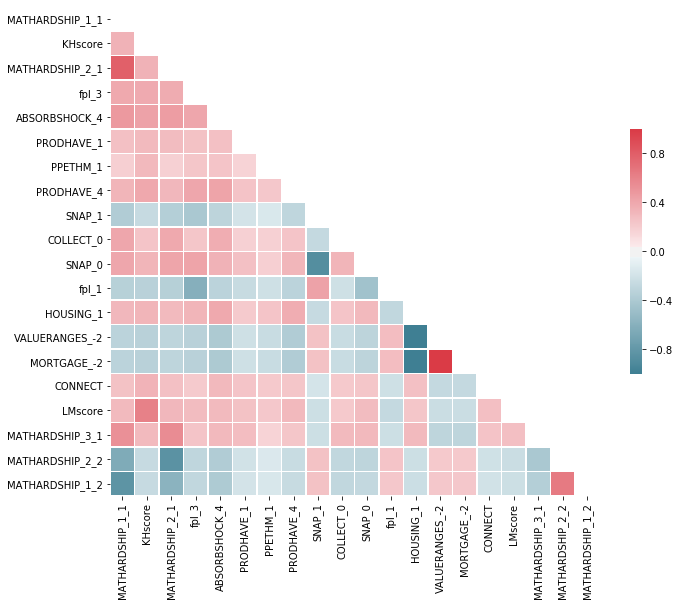

In [196]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(top20varscorr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(top20varscorr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

###### This approach is somewhat risky, we can see there are quite a few strong correlations in our top 20